In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"
#dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

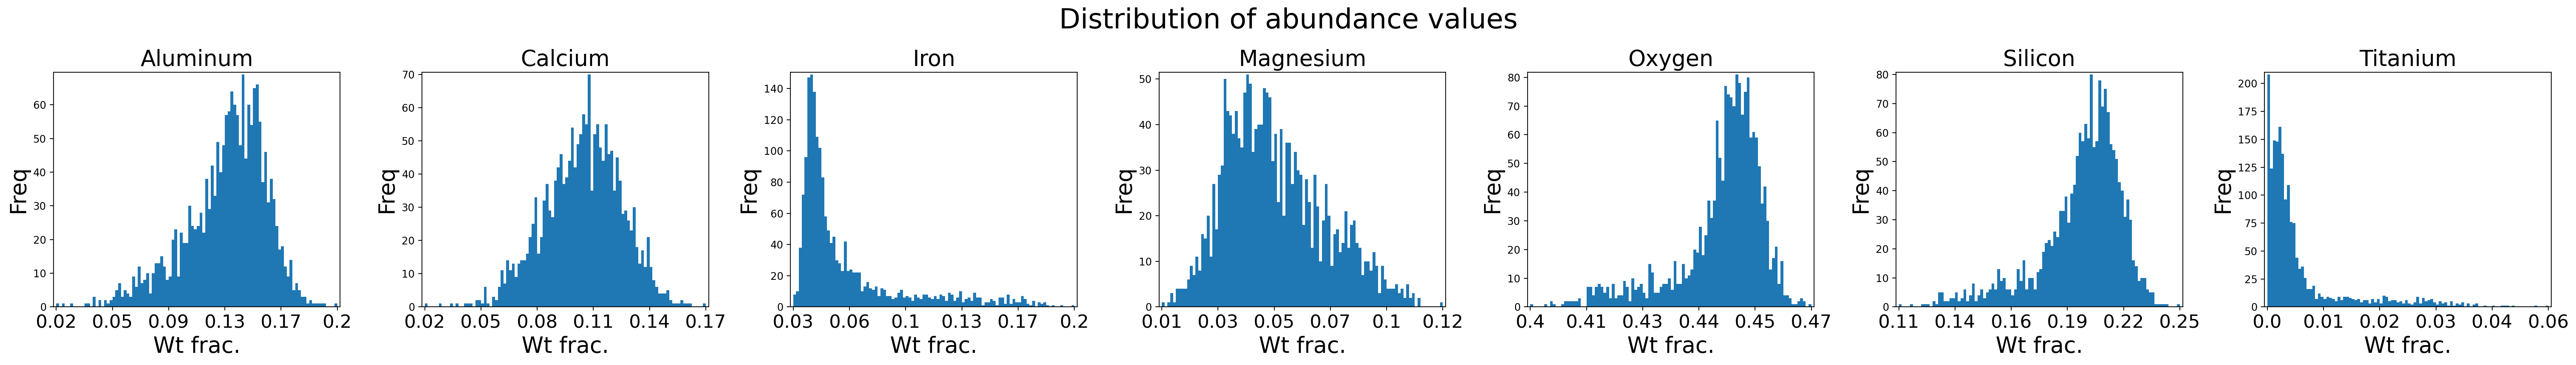

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

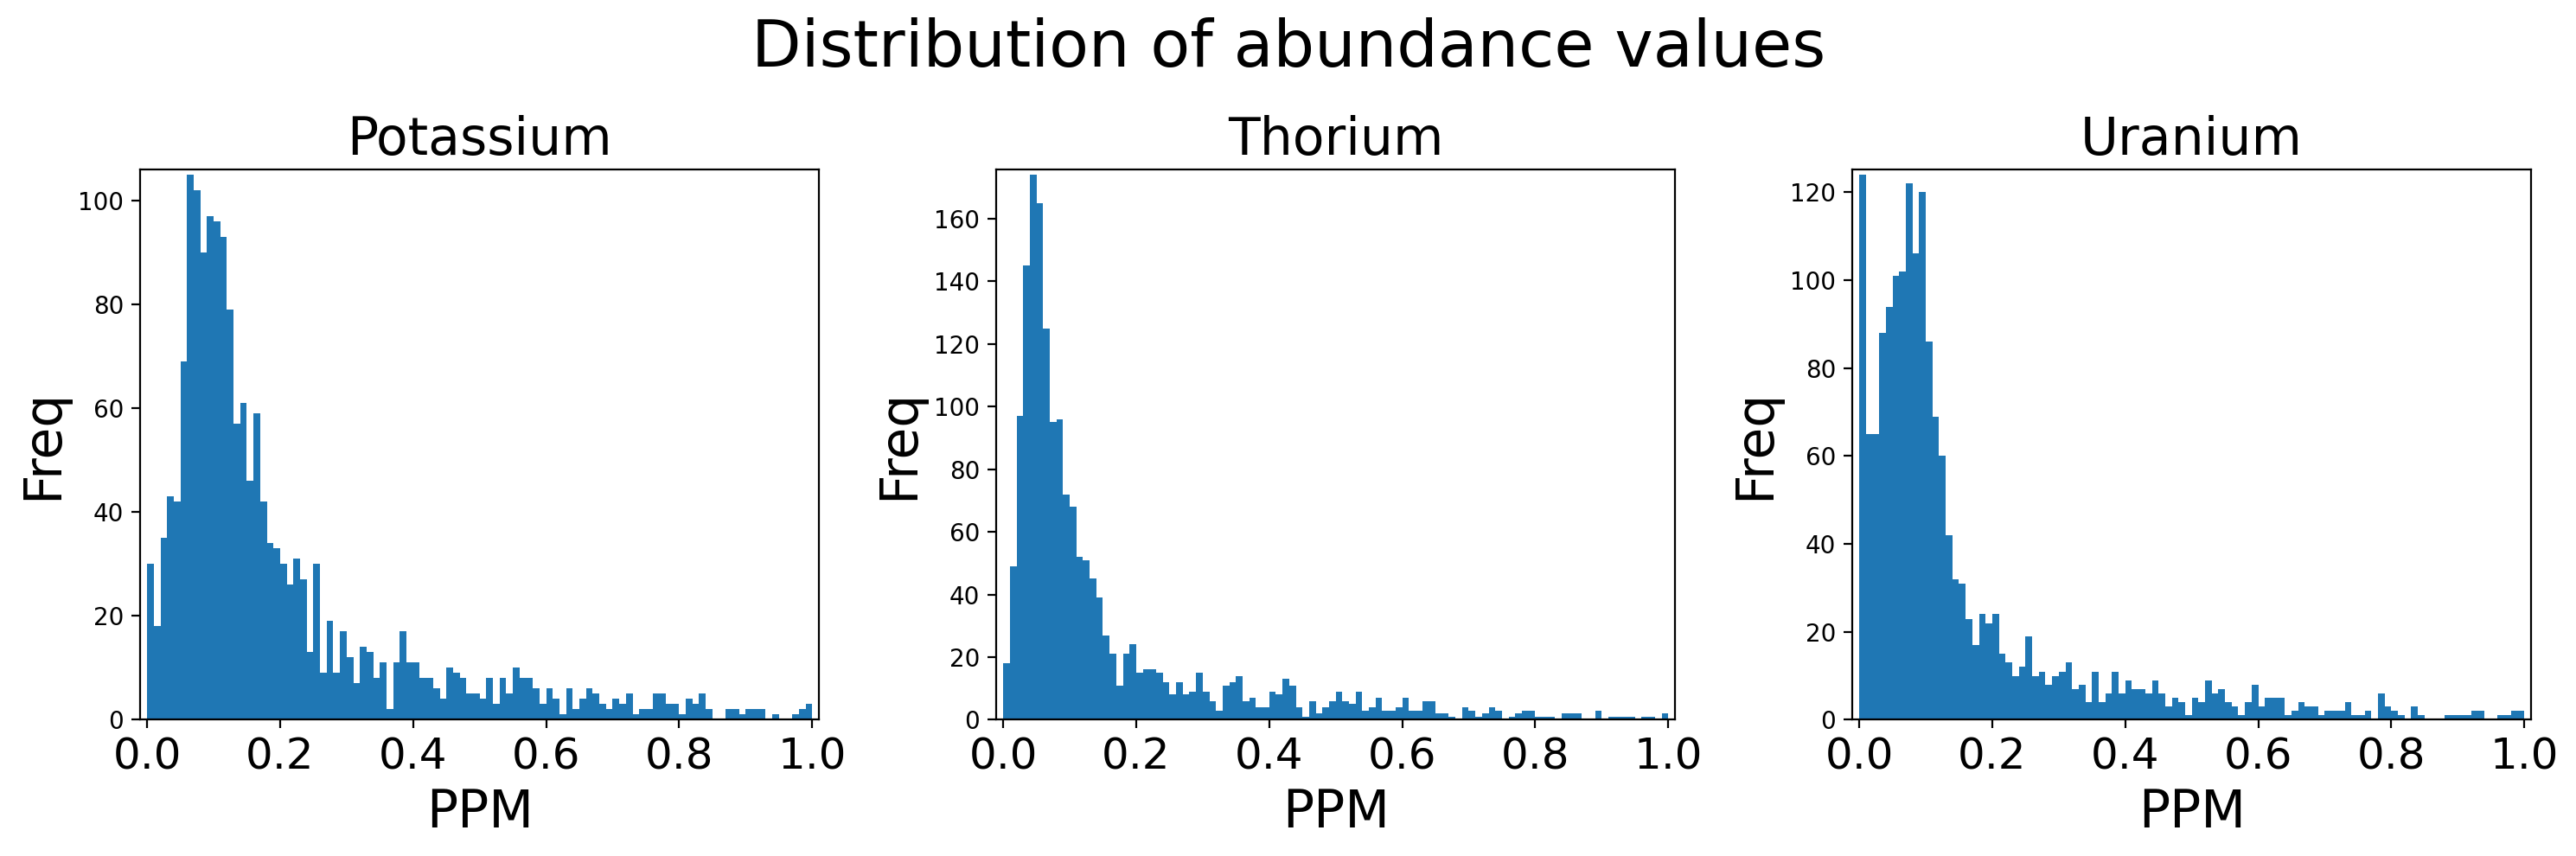

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

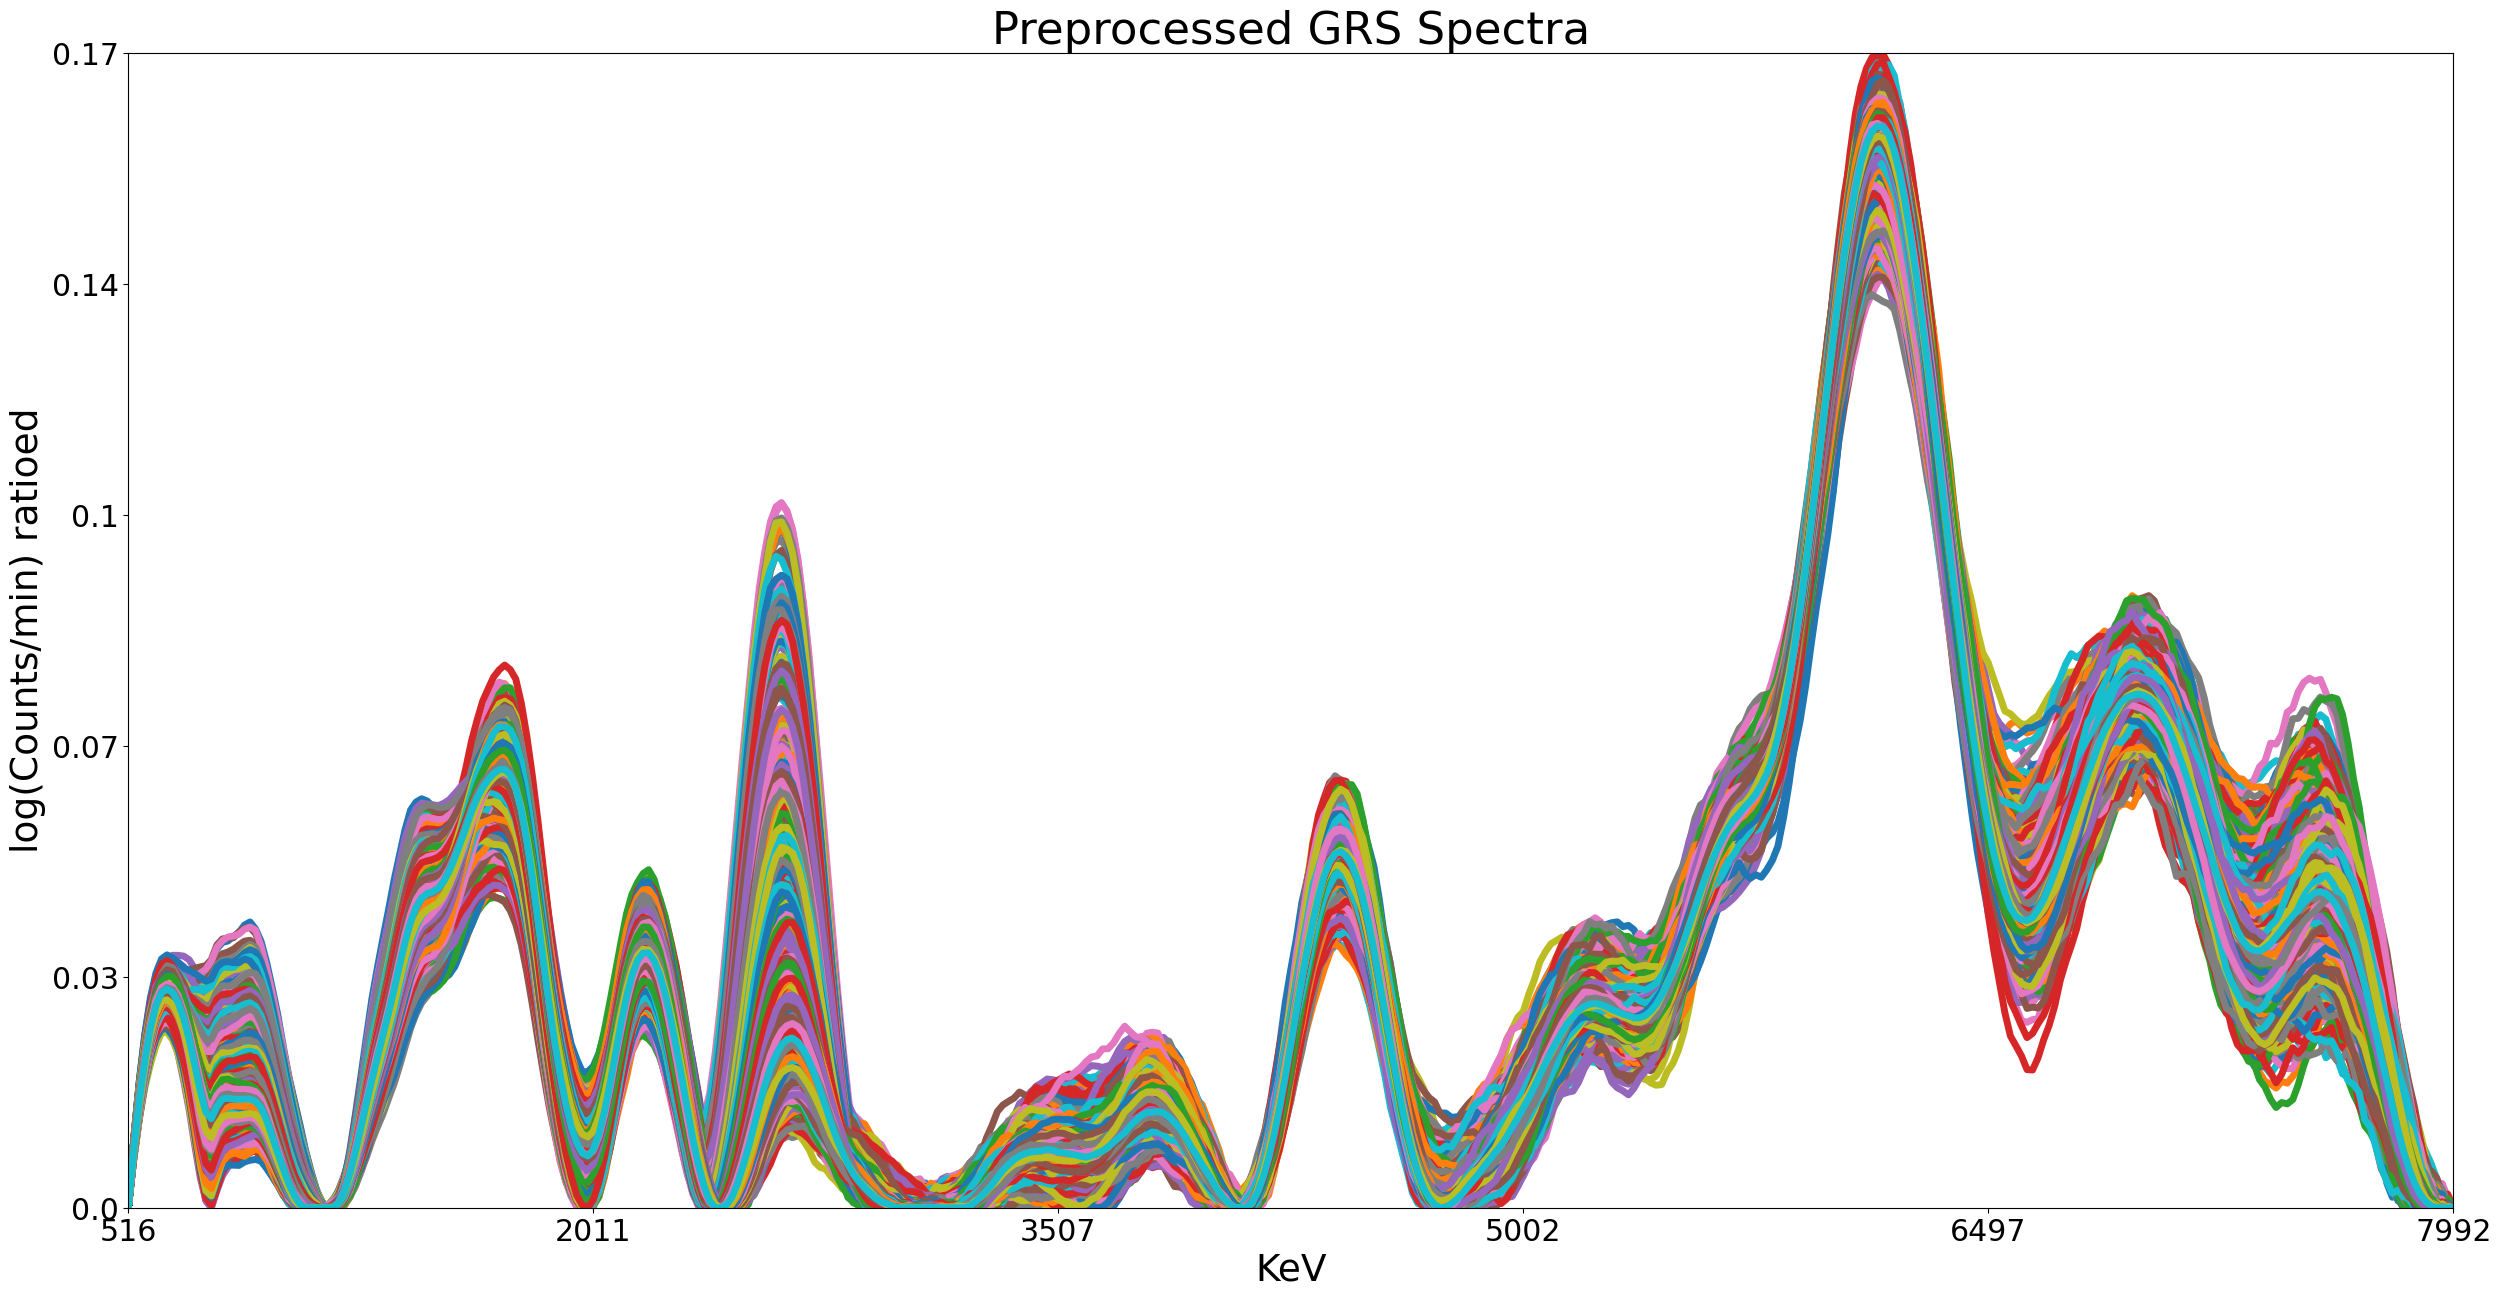

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import tensorflow
import tensorflow as tf

In [25]:
#set a global seed value
globalSeed=23

In [26]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [27]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [28]:
# define a funtion which creates the CAM (Channel Attention Module)
def createCAM(inputFeatureBlock,reductionRatio):
    #perform max pooling along the channel dimension
    channelMaxPooledFeatures=tf.math.reduce_max(inputFeatureBlock,
                                                axis=1,
                                                keepdims=False)
    
    #perform avg pooling along the channel dimension
    channelAvgPooledFeatures=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=1,
                                                 keepdims=False)
    
    #create the bottleneck for the MLP
    bottleneckLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1]//reductionRatio,
                                          activation='relu')
    
    #create the recontruction layer for the MLP
    outputLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1],
                                      activation='relu')
    
    
    #pass the max pooled features through the bottle-neck
    reconstructeedMaxPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #pass the avg pooled features through the bottle-neck
    reconstructeedAvgPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #add the two reconstructed features together
    summedFeatures=tf.math.add(reconstructeedMaxPooledFeatures,
                               reconstructeedAvgPooledFeatures)
    
    #apply sigmoid activation to the summed features to get the channel attention map
    channelAttentionMap=tf.keras.activations.sigmoid(summedFeatures)
    
    #return the channel attention map
    return channelAttentionMap

In [29]:
#define a function to create the Spatial attention module (SAM)
def createSAM(inputFeatureBlock,kernelSize):
    #perform max pooling on the input features
    maxPooledFeatureMap=tf.math.reduce_max(inputFeatureBlock,
                                           axis=-1,
                                           keepdims=False)
    #perform average pooling on the input features
    averagePooledFeatureMap=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=-1,
                                                 keepdims=False)
    
    #concatenate the feature maps together
    concatenatedFeatureMaps=tf.concat([tf.expand_dims(maxPooledFeatureMap,
                                                      axis=-1),
                                       tf.expand_dims(averagePooledFeatureMap,
                                                      axis=-1)],
                                      axis=-1)
    
    #create the convolutional layer to be applied to the concatenated feature map
    convolutionLayer=tf.keras.layers.Conv1D(filters=1,
                                            kernel_size=kernelSize,
                                            strides=1,
                                            padding='same',
                                            activation='sigmoid')
    
    
    #get the spatial attention map
    spatialAttentionMap=convolutionLayer(concatenatedFeatureMaps)
    
    
    #return the channel attention map
    return spatialAttentionMap

In [30]:
#define a function which creates a CBAM block
def createCBAM(inputLayer,convolutionalKernelSize,noOfConvolutionalFilters,reductionRatio,spatialKernelSize):
    #create a convolutional layer
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfConvolutionalFilters,
                                              kernel_size=convolutionalKernelSize,
                                              strides=1,
                                              padding='same')
    #get the feature block from the convolutional layer
    convolutionalFeatures=convolutionalLayer(inputLayer)
    
    #get the channel attention map
    channelAttentionMap=createCAM(convolutionalFeatures,
                                  reductionRatio)
    
    #replicate the channel attention to make it multiplicative with the features
    replicatedChannelAttentionMaps=tf.expand_dims(channelAttentionMap,
                                                  axis=1)
    replicatedChannelAttentionMaps=tf.repeat(replicatedChannelAttentionMaps,
                                             convolutionalFeatures.shape[1],
                                             axis=1)
    
    #compute the channel refined feature by performing element-wise multiplication between the features and the channel attention maps
    channelRefinedFeatures=tf.math.multiply(replicatedChannelAttentionMaps,
                                            convolutionalFeatures)
    
    #get the spatial attention map
    spatialAttentionMap=createSAM(channelRefinedFeatures,
                                  spatialKernelSize)
    
    #replicate the attention map to make it multiplicative with the channel-refined features
    replicatedSpatialAttentionMaps=tf.repeat(spatialAttentionMap,
                                             channelRefinedFeatures.shape[-1],
                                             axis=-1)
    
    #multiply the attention map with the channel refined features
    spatiallyRefinedFeatures=tf.math.multiply(replicatedSpatialAttentionMaps,
                                              channelRefinedFeatures)
    
    
    #add the refined features to the original features
    refinedFeatures=tf.math.add(convolutionalFeatures,
                                spatiallyRefinedFeatures)
    
    #return the refined features (i.e. the output of the CBAM)
    return refinedFeatures

In [31]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, stride,, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,dropoutRate,noOfCBAMBLocks):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                         noise_shape=None,
                                         seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    #add the specified number of CBAM blocks
    for i in range(noOfCBAMBLocks):
        #add the CBAM module
        volume=createCBAM(volume,
                          convolutionalKernelSize=kernelSize,
                          noOfConvolutionalFilters=noOfFilters,
                          reductionRatio=2,
                          spatialKernelSize=3)
        
        
        #apply batch norm over the refined features
        batchNormalization=tf.keras.layers.BatchNormalization()
        #add the 1st batch-norm layer to the graph
        volume=batchNormalization(volume)
        
        #apply dropout
        dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                             noise_shape=None,
                                             seed=globalSeed)
        #add the 1st dropout layer to the graph
        volume=dropoutLayer(volume)
    
    return volume

In [32]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[4,4,4,4]

In [33]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [34]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [35]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [36]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [37]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[2,2,2,2]

In [38]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [39]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [40]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [41]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [42]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [43]:
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [44]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [45]:
#define regularization for the element-wise spectra
#the regularizer encourages the elemental spectra to be different
#this is done by computing the pairwise cosine distances, summing them up and maximizing this sum

#as these weights are from seperate (parallel)layers this regularization could not be implemented as inheriting the kernel regularization class
#therefore it is implemented as a loss. As such it recieves the true and predicted values but ignores them
class spectralDisimilarityRegularization(tf.keras.losses.Loss):
    def call(self,linearLayerWeights,_):
        #normalize the weights
        linearLayerWeights=tf.math.l2_normalize(linearLayerWeights,
                                                axis=-2,
                                                epsilon=1e-1)

        #multiply the weights by their transpose to get the dot products (provided the weight vectors have an l2-norm of 1)
        #sum the dot products up to get a value proportional to the sum of pairwise dot products
        unmixingSpectralSimilarity=tf.math.reduce_sum(tf.linalg.matmul(linearLayerWeights,
                                                                       linearLayerWeights,
                                                                       transpose_b=True))
        #compute sum of cosine similarities by subtracting the number of sames from the data and then dividing by half
        unmixingSpectralSimilarity=(unmixingSpectralSimilarity-linearLayerWeights.shape[-1])/2

        #return the similarity estimate which is the regularization value
        return unmixingSpectralSimilarity
    

In [46]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class UnitNormNonNegetivityConstraint(tf.keras.constraints.Constraint):
    def __init__(self,axis=0):
        self.axis=axis
    def __call__(self, w):
        #apply positivity constraint
        w=w*tf.cast(tf.greater_equal(w,0.0),
                    tf.keras.backend.floatx())
        
        return w



#create the composite constraint by combining the two constraints
unitNormNonNegetivityConstraint=UnitNormNonNegetivityConstraint()

In [47]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
abundanceScaledElementalSpectra=[]
#iterate through each element
for i in range(fullAbundanceEmbedding.shape[-1]):
    #create a contraintedhidden layer to learn the current element's spectra
    temp=tf.keras.layers.Dense(noOfChannels,
                               activation=None,
                               use_bias=False,
                               kernel_constraint=unitNormNonNegetivityConstraint,
                               name=allElementNames[i]+"_Spectra")
    
    
    #save the layer to a list
    elementWiseHiddenLayers.append(temp)
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp=temp(tf.expand_dims(fullAbundanceEmbedding[:,i],
                             -1))
    #save the learnt spectra
    abundanceScaledElementalSpectra.append(temp)
    #delete the temporary variable
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {abundanceScaledElementalSpectra[-1].shape}")


Shape of the spectra outputed by Aluminum (None, 421)
Shape of the spectra outputed by Calcium (None, 421)
Shape of the spectra outputed by Iron (None, 421)
Shape of the spectra outputed by Magnesium (None, 421)
Shape of the spectra outputed by Oxygen (None, 421)
Shape of the spectra outputed by Silicon (None, 421)
Shape of the spectra outputed by Titanium (None, 421)
Shape of the spectra outputed by Potassium (None, 421)
Shape of the spectra outputed by Thorium (None, 421)
Shape of the spectra outputed by Uranium (None, 421)


In [48]:
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#iterate through each element and divide its scaled spectra by its abundance to get the original spectra
for i in range(fullAbundanceEmbedding.shape[-1]):
   
    #divide the layer by its abundance to get the unscaled spectra
    temp=tf.math.divide(abundanceScaledElementalSpectra[i],
                        fullAbundanceEmbedding[:,i])
    
    #save the learnt spectra
    unscaledElementalSpectra.append(temp)
    #delete the temporary variable
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {unscaledElementalSpectra[-1].shape}")


Shape of the spectra outputed by Aluminum (None, 421)
Shape of the spectra outputed by Calcium (None, 421)
Shape of the spectra outputed by Iron (None, 421)
Shape of the spectra outputed by Magnesium (None, 421)
Shape of the spectra outputed by Oxygen (None, 421)
Shape of the spectra outputed by Silicon (None, 421)
Shape of the spectra outputed by Titanium (None, 421)
Shape of the spectra outputed by Potassium (None, 421)
Shape of the spectra outputed by Thorium (None, 421)
Shape of the spectra outputed by Uranium (None, 421)


In [49]:
#stack the abundance scaled elemental spectra together
abundanceScaledElementalSpectra=tf.stack(abundanceScaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra scaled by abundance {abundanceScaledElementalSpectra.shape}")

Shape of tensor containing all ten elemental spectra scaled by abundance (None, 421, 10)


In [50]:
#stack the abundance scaled elemental spectra together
unscaledElementalSpectra=tf.stack(unscaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra {unscaledElementalSpectra.shape}")

Shape of tensor containing all ten elemental spectra (None, 421, 10)


In [51]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(abundanceScaledElementalSpectra,
                                        axis=-1,
                                        keepdims=False)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

Shape of the linearly mixed spectra (None, 421)


In [52]:
#build the model
unmixingModel=tf.keras.Model(inputs=inputLayer,
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      linearMixedSpectra,
                                      unscaledElementalSpectra],
                             name="Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model")

In [53]:
#create loss functions for the embeddings, Mean Squared Error
regularAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
nuclearAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
#set the number of epochs the model is to be trained for
noOfEpochs=2000
#set the batch size
batchSize=32

#create the regularizer
spectralDisimilarityRegularizer=spectralDisimilarityRegularization()

#steps the number of steps to be processed in one execution
stepsPerExecution=5

In [54]:
#create a loss dictionary
lossDictionary=[regularAbundanceLossFunction,
                nuclearAbundanceLossFunction,
                recontructedSpectraLoss,
                spectralDisimilarityRegularizer]

In [55]:
#creat a list with loss weights
lossWeights=[25e-2,
             1,
             1e-3,
             1e-3]

In [56]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=lossDictionary,
                      loss_weights=lossWeights,
                      steps_per_execution=stepsPerExecution)

In [57]:
#set the address where the untrained model will be saved
untrainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights.h5"
#untrainedModelWeightsAddress="D:/Non-academic/GSOC23/untrained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

In [58]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [59]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [60]:
#set the number of folds across which the model is to be evaluated
noOfFolds=5
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [61]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [62]:
noOfXticks=3
noOfYticks=5

In [63]:
#create a list to hold model training history
modelTrainingHistories=[]

In [64]:
#create an array to save the element-wise learnt spectra across folds
foldWiseLearntElementalSpectra=np.zeros((noOfChannels,
                                         fullAbundanceEmbedding.shape[-1],
                                         noOfFolds))

In [65]:
#iterate through the folds
for j,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #load the initial weights of the model (before training)
    unmixingModel.load_weights(untrainedModelWeightsAddress)
    #compile the model
    unmixingModel.compile(optimizer=optimizer,
                          loss=lossDictionary,
                          loss_weights=lossWeights,
                          steps_per_execution=stepsPerExecution)

    #fit the model to the current fold's data
    currentModelTrainingHistory=unmixingModel.fit(x=preprocessedSpectra[trainingIndices,:],
                                                  y=[regularElementalAbundances[trainingIndices,:],
                                                     nuclearElementalAbundances[trainingIndices,:],
                                                     preprocessedSpectra[trainingIndices,:],
                                                     nuclearElementalAbundances[trainingIndices,:]
                                                    ],
                                                  batch_size=batchSize,
                                                  epochs=noOfEpochs,
                                                  validation_data=(preprocessedSpectra[testingIndices,:],
                                                                   [regularElementalAbundances[testingIndices,:],
                                                                    nuclearElementalAbundances[testingIndices,:],
                                                                    preprocessedSpectra[testingIndices,:],
                                                                    nuclearElementalAbundances[testingIndices,:]
                                                                   ]
                                                                  )
                                                 )
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    #set the address where the untrained model will be saved
    #trainedModelWeightsAddress="D:/Non-academic/GSOC23/trained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"
    trainedModelWeightsAddress="C:/ML4Sci/Models/trained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder_Fold_"+str(j+1)+".h5"

    #save the untrained model
    unmixingModel.save_weights(trainedModelWeightsAddress,
                               overwrite=True)
    
    #iterate through all the elements and save their learnt spectra
    for i in range(len(allElementNames)):

        #get the mean spectrum for the current element
        currentElementSpectrum=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]

        #save the spectrum
        foldWiseLearntElementalSpectra[:,i,j]=currentElementSpectrum

Epoch 1/2000
45/45 [==============================] - 66s 1s/step - loss: 15.7435 - tf.math.divide_loss: 0.0024 - tf.math.abs_1_loss: 15.7215 - tf.math.reduce_sum_1_loss: -0.7371 - tf.stack_1_loss: 22.1581 - val_loss: 2.7060 - val_tf.math.divide_loss: 0.0091 - val_tf.math.abs_1_loss: 2.6805 - val_tf.math.reduce_sum_1_loss: -0.9002 - val_tf.stack_1_loss: 24.0883
Epoch 2/2000
45/45 [==============================] - 12s 265ms/step - loss: 1.0497 - tf.math.divide_loss: 5.0888e-04 - tf.math.abs_1_loss: 1.0283 - tf.math.reduce_sum_1_loss: -0.9457 - tf.stack_1_loss: 22.2353 - val_loss: 0.0869 - val_tf.math.divide_loss: 0.0560 - val_tf.math.abs_1_loss: 0.0496 - val_tf.math.reduce_sum_1_loss: -0.8862 - val_tf.stack_1_loss: 24.0883
Epoch 3/2000
45/45 [==============================] - 14s 310ms/step - loss: 0.6099 - tf.math.divide_loss: 4.6294e-04 - tf.math.abs_1_loss: 0.5890 - tf.math.reduce_sum_1_loss: -0.9854 - tf.stack_1_loss: 21.7899 - val_loss: 0.1092 - val_tf.math.divide_loss: 0.0494 - v

45/45 [==============================] - 13s 285ms/step - loss: 0.1355 - tf.math.divide_loss: 1.7911e-04 - tf.math.abs_1_loss: 0.1146 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 21.9323 - val_loss: 0.0866 - val_tf.math.divide_loss: 2.6990e-04 - val_tf.math.abs_1_loss: 0.0634 - val_tf.math.reduce_sum_1_loss: -0.9967 - val_tf.stack_1_loss: 24.0883
Epoch 24/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.1845 - tf.math.divide_loss: 1.8292e-04 - tf.math.abs_1_loss: 0.1631 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 22.3395 - val_loss: 0.1930 - val_tf.math.divide_loss: 1.8475e-04 - val_tf.math.abs_1_loss: 0.1699 - val_tf.math.reduce_sum_1_loss: -0.9966 - val_tf.stack_1_loss: 24.0883
Epoch 25/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.1279 - tf.math.divide_loss: 1.7859e-04 - tf.math.abs_1_loss: 0.1066 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 22.2183 - val_loss: 0.1673 - val_tf.math.divide_loss: 1.6305e-

Epoch 45/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.1275 - tf.math.divide_loss: 1.5352e-04 - tf.math.abs_1_loss: 0.1064 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 22.0780 - val_loss: 0.2438 - val_tf.math.divide_loss: 1.4472e-04 - val_tf.math.abs_1_loss: 0.2206 - val_tf.math.reduce_sum_1_loss: -0.9967 - val_tf.stack_1_loss: 24.0883
Epoch 46/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.1924 - tf.math.divide_loss: 1.5506e-04 - tf.math.abs_1_loss: 0.1718 - tf.math.reduce_sum_1_loss: -0.9967 - tf.stack_1_loss: 21.5871 - val_loss: 0.0768 - val_tf.math.divide_loss: 1.3451e-04 - val_tf.math.abs_1_loss: 0.0537 - val_tf.math.reduce_sum_1_loss: -0.9970 - val_tf.stack_1_loss: 24.0883
Epoch 47/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.1258 - tf.math.divide_loss: 1.5446e-04 - tf.math.abs_1_loss: 0.1051 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 21.6754 - val_loss: 0.0649 - val_tf.math.divide_

Epoch 67/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.2374 - tf.math.divide_loss: 1.3962e-04 - tf.math.abs_1_loss: 0.2160 - tf.math.reduce_sum_1_loss: -0.9969 - tf.stack_1_loss: 22.3638 - val_loss: 0.8795 - val_tf.math.divide_loss: 1.6143e-04 - val_tf.math.abs_1_loss: 0.8563 - val_tf.math.reduce_sum_1_loss: -0.9956 - val_tf.stack_1_loss: 24.0883
Epoch 68/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.2166 - tf.math.divide_loss: 1.3904e-04 - tf.math.abs_1_loss: 0.1957 - tf.math.reduce_sum_1_loss: -0.9969 - tf.stack_1_loss: 21.9295 - val_loss: 0.0778 - val_tf.math.divide_loss: 1.3926e-04 - val_tf.math.abs_1_loss: 0.0547 - val_tf.math.reduce_sum_1_loss: -0.9968 - val_tf.stack_1_loss: 24.0883
Epoch 69/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.3604 - tf.math.divide_loss: 1.4265e-04 - tf.math.abs_1_loss: 0.3393 - tf.math.reduce_sum_1_loss: -0.9970 - tf.stack_1_loss: 22.0815 - val_loss: 0.9783 - val_tf.math.divide_

Epoch 89/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.1056 - tf.math.divide_loss: 1.4014e-04 - tf.math.abs_1_loss: 0.0844 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 22.2008 - val_loss: 0.0456 - val_tf.math.divide_loss: 1.2882e-04 - val_tf.math.abs_1_loss: 0.0224 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.stack_1_loss: 24.0883
Epoch 90/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.1387 - tf.math.divide_loss: 1.4158e-04 - tf.math.abs_1_loss: 0.1172 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 22.4453 - val_loss: 0.2144 - val_tf.math.divide_loss: 1.5252e-04 - val_tf.math.abs_1_loss: 0.1913 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.stack_1_loss: 24.0883
Epoch 91/2000
45/45 [==============================] - 14s 301ms/step - loss: 0.0885 - tf.math.divide_loss: 1.3488e-04 - tf.math.abs_1_loss: 0.0675 - tf.math.reduce_sum_1_loss: -0.9972 - tf.stack_1_loss: 21.9775 - val_loss: 0.0439 - val_tf.math.divide_

Epoch 111/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.1588 - tf.math.divide_loss: 1.3555e-04 - tf.math.abs_1_loss: 0.1375 - tf.math.reduce_sum_1_loss: -0.9973 - tf.stack_1_loss: 22.2927 - val_loss: 0.1661 - val_tf.math.divide_loss: 1.2845e-04 - val_tf.math.abs_1_loss: 0.1430 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.stack_1_loss: 24.0883
Epoch 112/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0939 - tf.math.divide_loss: 1.3385e-04 - tf.math.abs_1_loss: 0.0726 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 22.3383 - val_loss: 0.0417 - val_tf.math.divide_loss: 1.2628e-04 - val_tf.math.abs_1_loss: 0.0185 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.stack_1_loss: 24.0883
Epoch 113/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0951 - tf.math.divide_loss: 1.3385e-04 - tf.math.abs_1_loss: 0.0740 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 22.1052 - val_loss: 0.0539 - val_tf.math.divi

Epoch 133/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0971 - tf.math.divide_loss: 1.3366e-04 - tf.math.abs_1_loss: 0.0761 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.9783 - val_loss: 0.0591 - val_tf.math.divide_loss: 1.5036e-04 - val_tf.math.abs_1_loss: 0.0360 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.stack_1_loss: 24.0883
Epoch 134/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0759 - tf.math.divide_loss: 1.2882e-04 - tf.math.abs_1_loss: 0.0544 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.3747 - val_loss: 0.0980 - val_tf.math.divide_loss: 1.2369e-04 - val_tf.math.abs_1_loss: 0.0749 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.stack_1_loss: 24.0883
Epoch 135/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0750 - tf.math.divide_loss: 1.2960e-04 - tf.math.abs_1_loss: 0.0532 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.8307 - val_loss: 0.0570 - val_tf.math.divi

Epoch 155/2000
45/45 [==============================] - 14s 301ms/step - loss: 0.0909 - tf.math.divide_loss: 1.2492e-04 - tf.math.abs_1_loss: 0.0698 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.1041 - val_loss: 0.0481 - val_tf.math.divide_loss: 1.5160e-04 - val_tf.math.abs_1_loss: 0.0249 - val_tf.math.reduce_sum_1_loss: -0.9970 - val_tf.stack_1_loss: 24.0883
Epoch 156/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0757 - tf.math.divide_loss: 1.3053e-04 - tf.math.abs_1_loss: 0.0548 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.8425 - val_loss: 0.1903 - val_tf.math.divide_loss: 1.3147e-04 - val_tf.math.abs_1_loss: 0.1672 - val_tf.math.reduce_sum_1_loss: -0.9961 - val_tf.stack_1_loss: 24.0883
Epoch 157/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0690 - tf.math.divide_loss: 1.2300e-04 - tf.math.abs_1_loss: 0.0476 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.3930 - val_loss: 0.0339 - val_tf.math.divi

Epoch 177/2000
45/45 [==============================] - 14s 305ms/step - loss: 0.0794 - tf.math.divide_loss: 1.2240e-04 - tf.math.abs_1_loss: 0.0581 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.2331 - val_loss: 0.0470 - val_tf.math.divide_loss: 1.2468e-04 - val_tf.math.abs_1_loss: 0.0239 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.0883
Epoch 178/2000
45/45 [==============================] - 14s 308ms/step - loss: 0.0738 - tf.math.divide_loss: 1.2049e-04 - tf.math.abs_1_loss: 0.0526 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.1669 - val_loss: 0.0401 - val_tf.math.divide_loss: 1.2715e-04 - val_tf.math.abs_1_loss: 0.0170 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.stack_1_loss: 24.0883
Epoch 179/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0959 - tf.math.divide_loss: 1.2036e-04 - tf.math.abs_1_loss: 0.0741 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.7418 - val_loss: 0.0730 - val_tf.math.divi

Epoch 199/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0605 - tf.math.divide_loss: 1.2562e-04 - tf.math.abs_1_loss: 0.0396 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.9285 - val_loss: 0.0655 - val_tf.math.divide_loss: 1.2919e-04 - val_tf.math.abs_1_loss: 0.0424 - val_tf.math.reduce_sum_1_loss: -0.9971 - val_tf.stack_1_loss: 24.0883
Epoch 200/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0527 - tf.math.divide_loss: 1.2157e-04 - tf.math.abs_1_loss: 0.0315 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.1471 - val_loss: 0.0588 - val_tf.math.divide_loss: 1.1792e-04 - val_tf.math.abs_1_loss: 0.0357 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.stack_1_loss: 24.0883
Epoch 201/2000
45/45 [==============================] - 14s 311ms/step - loss: 0.0722 - tf.math.divide_loss: 1.2167e-04 - tf.math.abs_1_loss: 0.0513 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.9076 - val_loss: 0.0663 - val_tf.math.divi

Epoch 221/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0578 - tf.math.divide_loss: 1.1437e-04 - tf.math.abs_1_loss: 0.0368 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.9441 - val_loss: 0.0570 - val_tf.math.divide_loss: 1.2049e-04 - val_tf.math.abs_1_loss: 0.0339 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 24.0883
Epoch 222/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0639 - tf.math.divide_loss: 1.1461e-04 - tf.math.abs_1_loss: 0.0422 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.6998 - val_loss: 0.0547 - val_tf.math.divide_loss: 1.2350e-04 - val_tf.math.abs_1_loss: 0.0315 - val_tf.math.reduce_sum_1_loss: -0.9971 - val_tf.stack_1_loss: 24.0883
Epoch 223/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0705 - tf.math.divide_loss: 1.1449e-04 - tf.math.abs_1_loss: 0.0490 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.5082 - val_loss: 0.8412 - val_tf.math.divi

Epoch 243/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0567 - tf.math.divide_loss: 1.1088e-04 - tf.math.abs_1_loss: 0.0356 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.1171 - val_loss: 0.1047 - val_tf.math.divide_loss: 1.3041e-04 - val_tf.math.abs_1_loss: 0.0816 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 24.0883
Epoch 244/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0576 - tf.math.divide_loss: 1.1282e-04 - tf.math.abs_1_loss: 0.0361 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.4972 - val_loss: 0.2762 - val_tf.math.divide_loss: 1.2104e-04 - val_tf.math.abs_1_loss: 0.2531 - val_tf.math.reduce_sum_1_loss: -0.9961 - val_tf.stack_1_loss: 24.0883
Epoch 245/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0534 - tf.math.divide_loss: 1.0918e-04 - tf.math.abs_1_loss: 0.0325 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.8922 - val_loss: 0.0591 - val_tf.math.divi

Epoch 265/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0540 - tf.math.divide_loss: 1.0829e-04 - tf.math.abs_1_loss: 0.0324 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.5291 - val_loss: 0.0473 - val_tf.math.divide_loss: 1.3093e-04 - val_tf.math.abs_1_loss: 0.0241 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.0883
Epoch 266/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0547 - tf.math.divide_loss: 1.0759e-04 - tf.math.abs_1_loss: 0.0337 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.0376 - val_loss: 0.0370 - val_tf.math.divide_loss: 1.1049e-04 - val_tf.math.abs_1_loss: 0.0139 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 24.0883
Epoch 267/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0603 - tf.math.divide_loss: 1.1249e-04 - tf.math.abs_1_loss: 0.0388 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.5515 - val_loss: 0.0675 - val_tf.math.divi

Epoch 287/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0548 - tf.math.divide_loss: 1.0695e-04 - tf.math.abs_1_loss: 0.0335 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 22.1905 - val_loss: 0.1097 - val_tf.math.divide_loss: 1.2992e-04 - val_tf.math.abs_1_loss: 0.0865 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.stack_1_loss: 24.0883
Epoch 288/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0514 - tf.math.divide_loss: 1.0482e-04 - tf.math.abs_1_loss: 0.0303 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.0307 - val_loss: 0.0438 - val_tf.math.divide_loss: 1.0791e-04 - val_tf.math.abs_1_loss: 0.0206 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.0883
Epoch 289/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0465 - tf.math.divide_loss: 1.0395e-04 - tf.math.abs_1_loss: 0.0253 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 22.1105 - val_loss: 0.0349 - val_tf.math.divi

Epoch 309/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0475 - tf.math.divide_loss: 1.0082e-04 - tf.math.abs_1_loss: 0.0264 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 22.0975 - val_loss: 0.0462 - val_tf.math.divide_loss: 1.1369e-04 - val_tf.math.abs_1_loss: 0.0231 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.stack_1_loss: 24.0883
Epoch 310/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0442 - tf.math.divide_loss: 1.0286e-04 - tf.math.abs_1_loss: 0.0230 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.1213 - val_loss: 0.0396 - val_tf.math.divide_loss: 1.1058e-04 - val_tf.math.abs_1_loss: 0.0165 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.0883
Epoch 311/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0453 - tf.math.divide_loss: 1.0454e-04 - tf.math.abs_1_loss: 0.0240 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.3041 - val_loss: 0.0466 - val_tf.math.divi

Epoch 331/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0432 - tf.math.divide_loss: 1.0069e-04 - tf.math.abs_1_loss: 0.0221 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.0630 - val_loss: 0.0329 - val_tf.math.divide_loss: 1.2487e-04 - val_tf.math.abs_1_loss: 0.0098 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.0883
Epoch 332/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0390 - tf.math.divide_loss: 9.9761e-05 - tf.math.abs_1_loss: 0.0181 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 21.9104 - val_loss: 0.0298 - val_tf.math.divide_loss: 1.2024e-04 - val_tf.math.abs_1_loss: 0.0066 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.0883
Epoch 333/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0360 - tf.math.divide_loss: 9.9337e-05 - tf.math.abs_1_loss: 0.0145 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 22.4757 - val_loss: 0.0585 - val_tf.math.divi

Epoch 353/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0288 - tf.math.divide_loss: 9.7395e-05 - tf.math.abs_1_loss: 0.0076 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 22.1883 - val_loss: 0.0318 - val_tf.math.divide_loss: 1.1446e-04 - val_tf.math.abs_1_loss: 0.0087 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.0883
Epoch 354/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0262 - tf.math.divide_loss: 9.7467e-05 - tf.math.abs_1_loss: 0.0052 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 22.0292 - val_loss: 0.0254 - val_tf.math.divide_loss: 1.1229e-04 - val_tf.math.abs_1_loss: 0.0023 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 24.0883
Epoch 355/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0257 - tf.math.divide_loss: 9.7062e-05 - tf.math.abs_1_loss: 0.0044 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 22.2873 - val_loss: 0.0285 - val_tf.math.divi

Epoch 375/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0240 - tf.math.divide_loss: 9.4633e-05 - tf.math.abs_1_loss: 0.0029 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.0247 - val_loss: 0.0263 - val_tf.math.divide_loss: 1.1153e-04 - val_tf.math.abs_1_loss: 0.0031 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.0883
Epoch 376/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0239 - tf.math.divide_loss: 9.4445e-05 - tf.math.abs_1_loss: 0.0031 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.7621 - val_loss: 0.0253 - val_tf.math.divide_loss: 1.2364e-04 - val_tf.math.abs_1_loss: 0.0022 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 377/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0243 - tf.math.divide_loss: 9.5674e-05 - tf.math.abs_1_loss: 0.0029 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.3378 - val_loss: 0.0271 - val_tf.math.divi

Epoch 397/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0244 - tf.math.divide_loss: 9.3070e-05 - tf.math.abs_1_loss: 0.0030 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.3820 - val_loss: 0.0260 - val_tf.math.divide_loss: 1.1293e-04 - val_tf.math.abs_1_loss: 0.0029 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.0883
Epoch 398/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0236 - tf.math.divide_loss: 9.1646e-05 - tf.math.abs_1_loss: 0.0027 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.8892 - val_loss: 0.0266 - val_tf.math.divide_loss: 1.0727e-04 - val_tf.math.abs_1_loss: 0.0035 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.0883
Epoch 399/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0241 - tf.math.divide_loss: 9.2299e-05 - tf.math.abs_1_loss: 0.0029 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.1940 - val_loss: 0.0250 - val_tf.math.divi

Epoch 419/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0243 - tf.math.divide_loss: 8.7556e-05 - tf.math.abs_1_loss: 0.0032 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.1343 - val_loss: 0.0266 - val_tf.math.divide_loss: 1.1576e-04 - val_tf.math.abs_1_loss: 0.0035 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 420/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0239 - tf.math.divide_loss: 8.9167e-05 - tf.math.abs_1_loss: 0.0029 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.9896 - val_loss: 0.0251 - val_tf.math.divide_loss: 1.1758e-04 - val_tf.math.abs_1_loss: 0.0020 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 421/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0243 - tf.math.divide_loss: 9.2217e-05 - tf.math.abs_1_loss: 0.0027 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5523 - val_loss: 0.0259 - val_tf.math.divi

Epoch 441/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0237 - tf.math.divide_loss: 8.6847e-05 - tf.math.abs_1_loss: 0.0025 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1282 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.0907e-04 - val_tf.math.abs_1_loss: 0.0028 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 442/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0239 - tf.math.divide_loss: 8.5666e-05 - tf.math.abs_1_loss: 0.0025 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3318 - val_loss: 0.0253 - val_tf.math.divide_loss: 1.1820e-04 - val_tf.math.abs_1_loss: 0.0022 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.0883
Epoch 443/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0242 - tf.math.divide_loss: 8.9241e-05 - tf.math.abs_1_loss: 0.0027 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.4658 - val_loss: 0.0248 - val_tf.math.divi

Epoch 463/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0235 - tf.math.divide_loss: 8.3544e-05 - tf.math.abs_1_loss: 0.0022 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1932 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.1134e-04 - val_tf.math.abs_1_loss: 0.0026 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 464/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0235 - tf.math.divide_loss: 8.4848e-05 - tf.math.abs_1_loss: 0.0026 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8925 - val_loss: 0.0277 - val_tf.math.divide_loss: 1.0909e-04 - val_tf.math.abs_1_loss: 0.0045 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.0883
Epoch 465/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0239 - tf.math.divide_loss: 8.5249e-05 - tf.math.abs_1_loss: 0.0023 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5245 - val_loss: 0.0249 - val_tf.math.divi

Epoch 485/2000
45/45 [==============================] - 14s 312ms/step - loss: 0.0233 - tf.math.divide_loss: 8.6700e-05 - tf.math.abs_1_loss: 0.0019 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4526 - val_loss: 0.0254 - val_tf.math.divide_loss: 1.1334e-04 - val_tf.math.abs_1_loss: 0.0023 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.0883
Epoch 486/2000
45/45 [==============================] - 14s 307ms/step - loss: 0.0232 - tf.math.divide_loss: 8.3707e-05 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1687 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.0944e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 487/2000
45/45 [==============================] - 14s 310ms/step - loss: 0.0232 - tf.math.divide_loss: 8.3351e-05 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2610 - val_loss: 0.0246 - val_tf.math.divi

Epoch 507/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0230 - tf.math.divide_loss: 8.1161e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3270 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.1864e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 508/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0236 - tf.math.divide_loss: 8.1991e-05 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6346 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.1261e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 509/2000
45/45 [==============================] - 14s 304ms/step - loss: 0.0226 - tf.math.divide_loss: 8.0435e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9446 - val_loss: 0.0247 - val_tf.math.divi

Epoch 529/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0230 - tf.math.divide_loss: 7.7199e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4048 - val_loss: 0.0249 - val_tf.math.divide_loss: 1.2026e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 530/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0226 - tf.math.divide_loss: 8.0484e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9115 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.2368e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 531/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0229 - tf.math.divide_loss: 7.8201e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0810 - val_loss: 0.0248 - val_tf.math.divi

Epoch 551/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0241 - tf.math.divide_loss: 7.6821e-05 - tf.math.abs_1_loss: 0.0019 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 23.1952 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.1397e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 552/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0231 - tf.math.divide_loss: 7.7635e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3475 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.0856e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 553/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0224 - tf.math.divide_loss: 7.3716e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7288 - val_loss: 0.0246 - val_tf.math.divi

Epoch 573/2000
45/45 [==============================] - 14s 310ms/step - loss: 0.0226 - tf.math.divide_loss: 7.3699e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0086 - val_loss: 0.0252 - val_tf.math.divide_loss: 1.2303e-04 - val_tf.math.abs_1_loss: 0.0021 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 574/2000
45/45 [==============================] - 15s 333ms/step - loss: 0.0233 - tf.math.divide_loss: 7.3734e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.7276 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1269e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 575/2000
45/45 [==============================] - 14s 305ms/step - loss: 0.0221 - tf.math.divide_loss: 7.4531e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4571 - val_loss: 0.0246 - val_tf.math.divi

Epoch 595/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0230 - tf.math.divide_loss: 7.4617e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2439 - val_loss: 0.0250 - val_tf.math.divide_loss: 1.1484e-04 - val_tf.math.abs_1_loss: 0.0019 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 596/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0232 - tf.math.divide_loss: 7.1320e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6006 - val_loss: 0.0253 - val_tf.math.divide_loss: 1.1408e-04 - val_tf.math.abs_1_loss: 0.0022 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 597/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0234 - tf.math.divide_loss: 7.1219e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.7064 - val_loss: 0.0253 - val_tf.math.divi

Epoch 617/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0230 - tf.math.divide_loss: 7.0347e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4947 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.1072e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 618/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0233 - tf.math.divide_loss: 7.0595e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6610 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.1492e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 619/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0226 - tf.math.divide_loss: 7.0436e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9847 - val_loss: 0.0244 - val_tf.math.divi

Epoch 639/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0225 - tf.math.divide_loss: 7.0702e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0151 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.2282e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 640/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0226 - tf.math.divide_loss: 6.8157e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0926 - val_loss: 0.0249 - val_tf.math.divide_loss: 1.1359e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 641/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0222 - tf.math.divide_loss: 6.5933e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8054 - val_loss: 0.0244 - val_tf.math.divi

Epoch 661/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0228 - tf.math.divide_loss: 6.5259e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4439 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2474e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 662/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0230 - tf.math.divide_loss: 6.6249e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6117 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1655e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 663/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0224 - tf.math.divide_loss: 6.7049e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9251 - val_loss: 0.0244 - val_tf.math.divi

Epoch 683/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0229 - tf.math.divide_loss: 6.7176e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4278 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2724e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 684/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0227 - tf.math.divide_loss: 6.5715e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2963 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.3223e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 685/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0226 - tf.math.divide_loss: 6.4951e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1094 - val_loss: 0.0243 - val_tf.math.divi

Epoch 705/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0225 - tf.math.divide_loss: 6.3469e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0809 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1237e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 706/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0225 - tf.math.divide_loss: 6.3698e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1840 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2012e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 707/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0224 - tf.math.divide_loss: 6.1051e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0418 - val_loss: 0.0243 - val_tf.math.divi

Epoch 727/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0228 - tf.math.divide_loss: 6.0698e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2493 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.1692e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 728/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0224 - tf.math.divide_loss: 6.0026e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0450 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.2867e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 729/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0227 - tf.math.divide_loss: 6.2477e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3146 - val_loss: 0.0252 - val_tf.math.divi

Epoch 749/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0226 - tf.math.divide_loss: 5.7359e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2512 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2058e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 750/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0227 - tf.math.divide_loss: 6.0803e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2178 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2429e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 751/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0226 - tf.math.divide_loss: 5.7391e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1126 - val_loss: 0.0243 - val_tf.math.divi

Epoch 771/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0225 - tf.math.divide_loss: 5.9579e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0610 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.3034e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 772/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0231 - tf.math.divide_loss: 5.6108e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6896 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1796e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 773/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0226 - tf.math.divide_loss: 5.5674e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2896 - val_loss: 0.0261 - val_tf.math.divi

Epoch 793/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0230 - tf.math.divide_loss: 5.6453e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6121 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2281e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 794/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0227 - tf.math.divide_loss: 5.5712e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2802 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2512e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 795/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0222 - tf.math.divide_loss: 5.5864e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8263 - val_loss: 0.0245 - val_tf.math.divi

Epoch 815/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0227 - tf.math.divide_loss: 5.5255e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2880 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2536e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 816/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0227 - tf.math.divide_loss: 5.3486e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3708 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.2667e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 817/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0230 - tf.math.divide_loss: 5.3722e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5992 - val_loss: 0.0243 - val_tf.math.divi

Epoch 837/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0225 - tf.math.divide_loss: 5.1235e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1381 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.1949e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 838/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0224 - tf.math.divide_loss: 5.1429e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1461 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.2412e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 839/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0227 - tf.math.divide_loss: 5.2128e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3878 - val_loss: 0.0242 - val_tf.math.divi

Epoch 859/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0220 - tf.math.divide_loss: 4.8724e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7953 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2163e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 860/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0229 - tf.math.divide_loss: 5.0200e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5931 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2385e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 861/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0224 - tf.math.divide_loss: 4.8847e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1614 - val_loss: 0.0243 - val_tf.math.divi

Epoch 881/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0224 - tf.math.divide_loss: 4.8086e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2373 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2512e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 882/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0225 - tf.math.divide_loss: 4.7624e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2485 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2627e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 883/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0223 - tf.math.divide_loss: 4.7501e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0578 - val_loss: 0.0244 - val_tf.math.divi

Epoch 903/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0225 - tf.math.divide_loss: 4.6764e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2631 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2410e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 904/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0229 - tf.math.divide_loss: 4.6456e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4458 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2505e-04 - val_tf.math.abs_1_loss: 0.0027 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.0883
Epoch 905/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0225 - tf.math.divide_loss: 4.5479e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1575 - val_loss: 0.0242 - val_tf.math.divi

Epoch 925/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0225 - tf.math.divide_loss: 4.4819e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1981 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2456e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 926/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0225 - tf.math.divide_loss: 4.5030e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1699 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2505e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 927/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0222 - tf.math.divide_loss: 4.6134e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9779 - val_loss: 0.0246 - val_tf.math.divi

Epoch 947/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0224 - tf.math.divide_loss: 4.5481e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1283 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2734e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 948/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0222 - tf.math.divide_loss: 4.2185e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8487 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2420e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 949/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0225 - tf.math.divide_loss: 4.3469e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2826 - val_loss: 0.0249 - val_tf.math.divi

Epoch 969/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0226 - tf.math.divide_loss: 4.0357e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3786 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2460e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 970/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0220 - tf.math.divide_loss: 4.2396e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8541 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2720e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 971/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0231 - tf.math.divide_loss: 4.4263e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.7888 - val_loss: 0.0246 - val_tf.math.divi

Epoch 991/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0225 - tf.math.divide_loss: 4.0886e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2596 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2574e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 992/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0224 - tf.math.divide_loss: 3.9607e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2526 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2576e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 993/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0228 - tf.math.divide_loss: 4.0241e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6807 - val_loss: 0.0243 - val_tf.math.divi

Epoch 1013/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0223 - tf.math.divide_loss: 4.0782e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0978 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2039e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1014/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0227 - tf.math.divide_loss: 4.0638e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3856 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2232e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1015/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0222 - tf.math.divide_loss: 3.9254e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0312 - val_loss: 0.0243 - val_tf.math.d

Epoch 1035/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0231 - tf.math.divide_loss: 3.8501e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.9332 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.2533e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1036/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0228 - tf.math.divide_loss: 3.8119e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6368 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.2448e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1037/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0221 - tf.math.divide_loss: 3.8274e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9177 - val_loss: 0.0243 - val_tf.math.d

Epoch 1057/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0225 - tf.math.divide_loss: 3.7996e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1570 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.2936e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1058/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0225 - tf.math.divide_loss: 3.7124e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3786 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.3226e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1059/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0221 - tf.math.divide_loss: 3.7185e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7363 - val_loss: 0.0257 - val_tf.math.d

Epoch 1079/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0227 - tf.math.divide_loss: 3.5325e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5439 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.3034e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1080/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0239 - tf.math.divide_loss: 3.6044e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 23.6386 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2468e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1081/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0227 - tf.math.divide_loss: 3.5675e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5369 - val_loss: 0.0243 - val_tf.math.d

Epoch 1101/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0223 - tf.math.divide_loss: 3.5008e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1506 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.3051e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1102/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0223 - tf.math.divide_loss: 3.3856e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0635 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.3005e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1103/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0219 - tf.math.divide_loss: 3.3785e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7405 - val_loss: 0.0245 - val_tf.math.d

Epoch 1123/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0223 - tf.math.divide_loss: 3.4302e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0350 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.2562e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1124/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0225 - tf.math.divide_loss: 3.3837e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0605 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.2619e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1125/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0228 - tf.math.divide_loss: 3.2572e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3292 - val_loss: 0.0243 - val_tf.math.d

Epoch 1145/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0226 - tf.math.divide_loss: 3.3371e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3604 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.3016e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1146/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0228 - tf.math.divide_loss: 3.3780e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3053 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.2479e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1147/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0227 - tf.math.divide_loss: 3.2241e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3194 - val_loss: 0.0243 - val_tf.math.d

Epoch 1167/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0229 - tf.math.divide_loss: 3.2620e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5214 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.2709e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1168/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0224 - tf.math.divide_loss: 3.1002e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0554 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2819e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1169/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0224 - tf.math.divide_loss: 3.2427e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2485 - val_loss: 0.0243 - val_tf.math.d

Epoch 1189/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0229 - tf.math.divide_loss: 3.0225e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6014 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2312e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1190/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0225 - tf.math.divide_loss: 3.0919e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2718 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.2276e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1191/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0224 - tf.math.divide_loss: 3.0280e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1266 - val_loss: 0.0244 - val_tf.math.d

Epoch 1211/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0223 - tf.math.divide_loss: 3.2118e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1238 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2250e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1212/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0223 - tf.math.divide_loss: 2.9159e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2018 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2124e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1213/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0223 - tf.math.divide_loss: 2.8799e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2359 - val_loss: 0.0243 - val_tf.math.d

Epoch 1233/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0230 - tf.math.divide_loss: 3.0598e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.7584 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2900e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1234/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0226 - tf.math.divide_loss: 2.9735e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3665 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.3006e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1235/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0223 - tf.math.divide_loss: 2.9053e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1429 - val_loss: 0.0245 - val_tf.math.d

Epoch 1255/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0227 - tf.math.divide_loss: 2.7570e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4593 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.2330e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1256/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0228 - tf.math.divide_loss: 2.8305e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4894 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2480e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1257/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0220 - tf.math.divide_loss: 2.6857e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9067 - val_loss: 0.0243 - val_tf.math.d

Epoch 1277/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0226 - tf.math.divide_loss: 2.8011e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4428 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2953e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1278/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0220 - tf.math.divide_loss: 2.7323e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8527 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2514e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1279/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0225 - tf.math.divide_loss: 2.7216e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2518 - val_loss: 0.0244 - val_tf.math.d

Epoch 1299/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0216 - tf.math.divide_loss: 2.6063e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4875 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2673e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1300/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0226 - tf.math.divide_loss: 2.5164e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3364 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.3128e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1301/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0224 - tf.math.divide_loss: 2.7236e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1180 - val_loss: 0.0244 - val_tf.math.d

Epoch 1321/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0223 - tf.math.divide_loss: 2.6543e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2141 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.3107e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1322/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0223 - tf.math.divide_loss: 2.5820e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3037 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.3037e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1323/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0223 - tf.math.divide_loss: 2.6571e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1848 - val_loss: 0.0243 - val_tf.math.d

Epoch 1343/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0220 - tf.math.divide_loss: 2.5245e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8649 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2803e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1344/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0230 - tf.math.divide_loss: 2.5353e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.7960 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2624e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1345/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0225 - tf.math.divide_loss: 2.5031e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3071 - val_loss: 0.0243 - val_tf.math.d

Epoch 1365/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0221 - tf.math.divide_loss: 2.5202e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9807 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.3104e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1366/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0224 - tf.math.divide_loss: 2.3360e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2283 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2816e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1367/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0222 - tf.math.divide_loss: 2.4209e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0363 - val_loss: 0.0244 - val_tf.math.d

Epoch 1387/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0221 - tf.math.divide_loss: 2.3163e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9643 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.2798e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1388/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0224 - tf.math.divide_loss: 2.3706e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2505 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2923e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1389/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0223 - tf.math.divide_loss: 2.4448e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0555 - val_loss: 0.0245 - val_tf.math.d

Epoch 1409/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0223 - tf.math.divide_loss: 2.2437e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1608 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2760e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1410/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0231 - tf.math.divide_loss: 2.3106e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 23.0764 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.3411e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1411/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0223 - tf.math.divide_loss: 2.3005e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2978 - val_loss: 0.0243 - val_tf.math.d

Epoch 1431/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0220 - tf.math.divide_loss: 2.3385e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8797 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2749e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1432/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0224 - tf.math.divide_loss: 2.2284e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3846 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2716e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1433/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0226 - tf.math.divide_loss: 2.3803e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5872 - val_loss: 0.0242 - val_tf.math.d

Epoch 1453/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0225 - tf.math.divide_loss: 2.2007e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4143 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2723e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1454/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0222 - tf.math.divide_loss: 2.2382e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0355 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2643e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1455/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0225 - tf.math.divide_loss: 2.2503e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4741 - val_loss: 0.0243 - val_tf.math.d

Epoch 1475/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0221 - tf.math.divide_loss: 2.1975e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9767 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2614e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1476/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0222 - tf.math.divide_loss: 2.1255e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1309 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2585e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1477/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0223 - tf.math.divide_loss: 2.2076e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1598 - val_loss: 0.0243 - val_tf.math.d

Epoch 1497/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0227 - tf.math.divide_loss: 2.1371e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4202 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2551e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1498/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0222 - tf.math.divide_loss: 2.1412e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0474 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.3052e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1499/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0223 - tf.math.divide_loss: 2.1777e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1213 - val_loss: 0.0243 - val_tf.math.d

Epoch 1519/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0224 - tf.math.divide_loss: 2.0565e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3936 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2823e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1520/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0222 - tf.math.divide_loss: 2.0216e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1757 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2785e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1521/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0222 - tf.math.divide_loss: 2.1130e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1322 - val_loss: 0.0243 - val_tf.math.d

Epoch 1541/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0218 - tf.math.divide_loss: 2.1256e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7954 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.3058e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1542/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0221 - tf.math.divide_loss: 2.0113e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0283 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2861e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1543/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0220 - tf.math.divide_loss: 2.0701e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9182 - val_loss: 0.0244 - val_tf.math.d

Epoch 1563/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0226 - tf.math.divide_loss: 2.0263e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5378 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2969e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1564/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0222 - tf.math.divide_loss: 1.9973e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1332 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2724e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1565/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0218 - tf.math.divide_loss: 1.9529e-05 - tf.math.abs_1_loss: 9.9655e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8205 - val_loss: 0.0242 - val_tf.ma

Epoch 1585/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0223 - tf.math.divide_loss: 2.0118e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1953 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2595e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1586/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0225 - tf.math.divide_loss: 2.0157e-05 - tf.math.abs_1_loss: 9.9492e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5281 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.3419e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1587/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0224 - tf.math.divide_loss: 1.9013e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3619 - val_loss: 0.0243 - val_tf.ma

Epoch 1607/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0223 - tf.math.divide_loss: 1.9755e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2529 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.3010e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1608/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0223 - tf.math.divide_loss: 1.8783e-05 - tf.math.abs_1_loss: 9.2431e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3750 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2822e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1609/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0228 - tf.math.divide_loss: 1.9431e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.8133 - val_loss: 0.0243 - val_tf.ma

Epoch 1629/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0221 - tf.math.divide_loss: 1.7907e-05 - tf.math.abs_1_loss: 9.4747e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1941 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2889e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1630/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0222 - tf.math.divide_loss: 1.8740e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1574 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2987e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1631/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0223 - tf.math.divide_loss: 1.8825e-05 - tf.math.abs_1_loss: 9.7077e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3175 - val_loss: 0.0243 - val_t

Epoch 1651/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0220 - tf.math.divide_loss: 1.8209e-05 - tf.math.abs_1_loss: 9.9328e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0012 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.2462e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1652/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0222 - tf.math.divide_loss: 1.9093e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1346 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.2796e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1653/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0221 - tf.math.divide_loss: 1.9126e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0258 - val_loss: 0.0244 - val_tf.ma

Epoch 1673/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0221 - tf.math.divide_loss: 1.7644e-05 - tf.math.abs_1_loss: 9.7901e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1241 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2554e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1674/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0218 - tf.math.divide_loss: 1.8739e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7532 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.3305e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1675/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0225 - tf.math.divide_loss: 1.8580e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4530 - val_loss: 0.0245 - val_tf.ma

Epoch 1695/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0221 - tf.math.divide_loss: 1.7411e-05 - tf.math.abs_1_loss: 9.6062e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1469 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2742e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1696/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0222 - tf.math.divide_loss: 1.8345e-05 - tf.math.abs_1_loss: 9.8525e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1832 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2975e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1697/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0222 - tf.math.divide_loss: 1.8087e-05 - tf.math.abs_1_loss: 9.8811e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1723 - val_loss: 0.0242 - v

Epoch 1717/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0226 - tf.math.divide_loss: 1.8149e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6004 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2819e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1718/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0219 - tf.math.divide_loss: 1.7874e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8158 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2455e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1719/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0220 - tf.math.divide_loss: 1.8147e-05 - tf.math.abs_1_loss: 9.6771e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0625 - val_loss: 0.0243 - val_tf.ma

Epoch 1739/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0220 - tf.math.divide_loss: 1.7791e-05 - tf.math.abs_1_loss: 9.9293e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9894 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2788e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1740/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0224 - tf.math.divide_loss: 1.7227e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3629 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.3017e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1741/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0221 - tf.math.divide_loss: 1.7560e-05 - tf.math.abs_1_loss: 8.8523e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2067 - val_loss: 0.0244 - val_t

Epoch 1761/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0221 - tf.math.divide_loss: 1.6816e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0097 - val_loss: 0.0249 - val_tf.math.divide_loss: 1.2676e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1762/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0219 - tf.math.divide_loss: 1.6369e-05 - tf.math.abs_1_loss: 9.9587e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9210 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2677e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1763/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0221 - tf.math.divide_loss: 1.7186e-05 - tf.math.abs_1_loss: 9.5377e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1354 - val_loss: 0.0242 - val_t

Epoch 1783/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0222 - tf.math.divide_loss: 1.6659e-05 - tf.math.abs_1_loss: 9.6303e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1850 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2561e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1784/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0224 - tf.math.divide_loss: 1.7154e-05 - tf.math.abs_1_loss: 9.5920e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4476 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2359e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1785/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0223 - tf.math.divide_loss: 1.6774e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2933 - val_loss: 0.0243 - val_t

Epoch 1805/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0223 - tf.math.divide_loss: 1.6469e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2838 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2596e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1806/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0222 - tf.math.divide_loss: 1.6889e-05 - tf.math.abs_1_loss: 9.6828e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1849 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2902e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1807/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0219 - tf.math.divide_loss: 1.5833e-05 - tf.math.abs_1_loss: 9.1559e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9745 - val_loss: 0.0243 - val_t

Epoch 1827/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0222 - tf.math.divide_loss: 1.6423e-05 - tf.math.abs_1_loss: 9.7958e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1930 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2512e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1828/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0221 - tf.math.divide_loss: 1.6254e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0903 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2430e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1829/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0223 - tf.math.divide_loss: 1.5580e-05 - tf.math.abs_1_loss: 9.5822e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2990 - val_loss: 0.0243 - val_t

Epoch 1849/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0221 - tf.math.divide_loss: 1.6693e-05 - tf.math.abs_1_loss: 9.6973e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0780 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2819e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1850/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0223 - tf.math.divide_loss: 1.6321e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2795 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2613e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1851/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0225 - tf.math.divide_loss: 1.5854e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4392 - val_loss: 0.0242 - val_tf.ma

Epoch 1871/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0221 - tf.math.divide_loss: 1.6535e-05 - tf.math.abs_1_loss: 9.7817e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1044 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2325e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1872/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0219 - tf.math.divide_loss: 1.5903e-05 - tf.math.abs_1_loss: 9.2906e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9440 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2724e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1873/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0220 - tf.math.divide_loss: 1.6356e-05 - tf.math.abs_1_loss: 9.7621e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0509 - val_loss: 0.0243 - v

Epoch 1893/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0225 - tf.math.divide_loss: 1.5671e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4660 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2723e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1894/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0222 - tf.math.divide_loss: 1.5492e-05 - tf.math.abs_1_loss: 9.8405e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1694 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2566e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1895/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0225 - tf.math.divide_loss: 1.5221e-05 - tf.math.abs_1_loss: 9.4516e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5092 - val_loss: 0.0244 - val_t

Epoch 1915/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0217 - tf.math.divide_loss: 1.5329e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6767 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2862e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1916/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0219 - tf.math.divide_loss: 1.5789e-05 - tf.math.abs_1_loss: 9.8289e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9343 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.2737e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1917/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0221 - tf.math.divide_loss: 1.5183e-05 - tf.math.abs_1_loss: 9.4822e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1390 - val_loss: 0.0242 - val_t

Epoch 1937/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0219 - tf.math.divide_loss: 1.5090e-05 - tf.math.abs_1_loss: 9.2294e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9501 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2673e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1938/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0224 - tf.math.divide_loss: 1.5059e-05 - tf.math.abs_1_loss: 9.2894e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4654 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.2599e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.0883
Epoch 1939/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0219 - tf.math.divide_loss: 1.5008e-05 - tf.math.abs_1_loss: 9.2869e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9777 - val_loss: 0.0244 - v

Epoch 1959/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0221 - tf.math.divide_loss: 1.5357e-05 - tf.math.abs_1_loss: 8.6086e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1853 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2597e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1960/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0218 - tf.math.divide_loss: 1.4852e-05 - tf.math.abs_1_loss: 9.0261e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9003 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2500e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1961/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0221 - tf.math.divide_loss: 1.4735e-05 - tf.math.abs_1_loss: 8.6291e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2144 - val_loss: 0.0243 - v

Epoch 1981/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0217 - tf.math.divide_loss: 1.4366e-05 - tf.math.abs_1_loss: 9.2340e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8205 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2534e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1982/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0221 - tf.math.divide_loss: 1.5278e-05 - tf.math.abs_1_loss: 8.9487e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1974 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2473e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.0883
Epoch 1983/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0221 - tf.math.divide_loss: 1.4910e-05 - tf.math.abs_1_loss: 8.6566e-04 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2342 - val_loss: 0.0247 - v

Epoch 3/2000
45/45 [==============================] - 12s 265ms/step - loss: 2.2515 - tf.math.divide_loss: 3.3689e-04 - tf.math.abs_1_loss: 2.2308 - tf.math.reduce_sum_1_loss: -0.9941 - tf.stack_1_loss: 21.6659 - val_loss: 267.5867 - val_tf.math.divide_loss: 0.0178 - val_tf.math.abs_1_loss: 267.5576 - val_tf.math.reduce_sum_1_loss: -0.9946 - val_tf.stack_1_loss: 25.5365
Epoch 4/2000
45/45 [==============================] - 12s 272ms/step - loss: 1.8490 - tf.math.divide_loss: 3.0243e-04 - tf.math.abs_1_loss: 1.8280 - tf.math.reduce_sum_1_loss: -0.9945 - tf.stack_1_loss: 21.8826 - val_loss: 56.0101 - val_tf.math.divide_loss: 0.0016 - val_tf.math.abs_1_loss: 55.9852 - val_tf.math.reduce_sum_1_loss: -0.9950 - val_tf.stack_1_loss: 25.5365
Epoch 5/2000
45/45 [==============================] - 12s 269ms/step - loss: 1.6242 - tf.math.divide_loss: 2.7632e-04 - tf.math.abs_1_loss: 1.6037 - tf.math.reduce_sum_1_loss: -0.9947 - tf.stack_1_loss: 21.4662 - val_loss: 24.8478 - val_tf.math.divide_loss

Epoch 25/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.3926 - tf.math.divide_loss: 1.8236e-04 - tf.math.abs_1_loss: 0.3720 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 21.5674 - val_loss: 0.0557 - val_tf.math.divide_loss: 1.6702e-04 - val_tf.math.abs_1_loss: 0.0312 - val_tf.math.reduce_sum_1_loss: -0.9964 - val_tf.stack_1_loss: 25.5365
Epoch 26/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.3777 - tf.math.divide_loss: 1.8522e-04 - tf.math.abs_1_loss: 0.3573 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 21.3560 - val_loss: 0.0728 - val_tf.math.divide_loss: 1.4384e-04 - val_tf.math.abs_1_loss: 0.0482 - val_tf.math.reduce_sum_1_loss: -0.9966 - val_tf.stack_1_loss: 25.5365
Epoch 27/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.4051 - tf.math.divide_loss: 1.8362e-04 - tf.math.abs_1_loss: 0.3848 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 21.2324 - val_loss: 0.0605 - val_tf.math.divide_

Epoch 47/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.1944 - tf.math.divide_loss: 1.6549e-04 - tf.math.abs_1_loss: 0.1740 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 21.3063 - val_loss: 0.0665 - val_tf.math.divide_loss: 1.3937e-04 - val_tf.math.abs_1_loss: 0.0419 - val_tf.math.reduce_sum_1_loss: -0.9968 - val_tf.stack_1_loss: 25.5365
Epoch 48/2000
45/45 [==============================] - 13s 278ms/step - loss: 0.1884 - tf.math.divide_loss: 1.6732e-04 - tf.math.abs_1_loss: 0.1676 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 21.7475 - val_loss: 0.0957 - val_tf.math.divide_loss: 1.4081e-04 - val_tf.math.abs_1_loss: 0.0712 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.stack_1_loss: 25.5365
Epoch 49/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.1961 - tf.math.divide_loss: 1.6009e-04 - tf.math.abs_1_loss: 0.1757 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 21.3887 - val_loss: 0.0900 - val_tf.math.divide_

Epoch 69/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.1267 - tf.math.divide_loss: 1.4664e-04 - tf.math.abs_1_loss: 0.1061 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 21.5207 - val_loss: 0.0601 - val_tf.math.divide_loss: 1.2912e-04 - val_tf.math.abs_1_loss: 0.0355 - val_tf.math.reduce_sum_1_loss: -0.9966 - val_tf.stack_1_loss: 25.5365
Epoch 70/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.1212 - tf.math.divide_loss: 1.4671e-04 - tf.math.abs_1_loss: 0.1004 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 21.7690 - val_loss: 0.0547 - val_tf.math.divide_loss: 1.2779e-04 - val_tf.math.abs_1_loss: 0.0302 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.stack_1_loss: 25.5365
Epoch 71/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.1333 - tf.math.divide_loss: 1.5390e-04 - tf.math.abs_1_loss: 0.1128 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 21.4389 - val_loss: 0.0603 - val_tf.math.divide_

Epoch 91/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.1506 - tf.math.divide_loss: 1.4217e-04 - tf.math.abs_1_loss: 0.1303 - tf.math.reduce_sum_1_loss: -0.9969 - tf.stack_1_loss: 21.3003 - val_loss: 0.0541 - val_tf.math.divide_loss: 1.3804e-04 - val_tf.math.abs_1_loss: 0.0295 - val_tf.math.reduce_sum_1_loss: -0.9973 - val_tf.stack_1_loss: 25.5365
Epoch 92/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.1191 - tf.math.divide_loss: 1.4665e-04 - tf.math.abs_1_loss: 0.0981 - tf.math.reduce_sum_1_loss: -0.9969 - tf.stack_1_loss: 21.9705 - val_loss: 0.0532 - val_tf.math.divide_loss: 1.3235e-04 - val_tf.math.abs_1_loss: 0.0287 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.stack_1_loss: 25.5365
Epoch 93/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.1403 - tf.math.divide_loss: 1.4339e-04 - tf.math.abs_1_loss: 0.1198 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 21.4628 - val_loss: 0.0542 - val_tf.math.divide_

Epoch 113/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0935 - tf.math.divide_loss: 1.3860e-04 - tf.math.abs_1_loss: 0.0725 - tf.math.reduce_sum_1_loss: -0.9970 - tf.stack_1_loss: 21.9438 - val_loss: 0.0900 - val_tf.math.divide_loss: 1.3368e-04 - val_tf.math.abs_1_loss: 0.0654 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.stack_1_loss: 25.5365
Epoch 114/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.1027 - tf.math.divide_loss: 1.3503e-04 - tf.math.abs_1_loss: 0.0822 - tf.math.reduce_sum_1_loss: -0.9970 - tf.stack_1_loss: 21.4549 - val_loss: 0.0693 - val_tf.math.divide_loss: 1.2994e-04 - val_tf.math.abs_1_loss: 0.0447 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.stack_1_loss: 25.5365
Epoch 115/2000
45/45 [==============================] - 13s 281ms/step - loss: 0.1268 - tf.math.divide_loss: 1.3889e-04 - tf.math.abs_1_loss: 0.1062 - tf.math.reduce_sum_1_loss: -0.9970 - tf.stack_1_loss: 21.6045 - val_loss: 0.0568 - val_tf.math.divi

Epoch 135/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.1072 - tf.math.divide_loss: 1.3375e-04 - tf.math.abs_1_loss: 0.0864 - tf.math.reduce_sum_1_loss: -0.9971 - tf.stack_1_loss: 21.7868 - val_loss: 0.0871 - val_tf.math.divide_loss: 1.2305e-04 - val_tf.math.abs_1_loss: 0.0626 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.stack_1_loss: 25.5365
Epoch 136/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.1094 - tf.math.divide_loss: 1.3051e-04 - tf.math.abs_1_loss: 0.0886 - tf.math.reduce_sum_1_loss: -0.9971 - tf.stack_1_loss: 21.8215 - val_loss: 0.0873 - val_tf.math.divide_loss: 1.2925e-04 - val_tf.math.abs_1_loss: 0.0627 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.stack_1_loss: 25.5365
Epoch 137/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0880 - tf.math.divide_loss: 1.3149e-04 - tf.math.abs_1_loss: 0.0675 - tf.math.reduce_sum_1_loss: -0.9971 - tf.stack_1_loss: 21.4799 - val_loss: 0.0639 - val_tf.math.divi

Epoch 157/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0857 - tf.math.divide_loss: 1.2840e-04 - tf.math.abs_1_loss: 0.0647 - tf.math.reduce_sum_1_loss: -0.9972 - tf.stack_1_loss: 21.8879 - val_loss: 0.0574 - val_tf.math.divide_loss: 1.2325e-04 - val_tf.math.abs_1_loss: 0.0328 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.stack_1_loss: 25.5365
Epoch 158/2000
45/45 [==============================] - 14s 301ms/step - loss: 0.0871 - tf.math.divide_loss: 1.2941e-04 - tf.math.abs_1_loss: 0.0667 - tf.math.reduce_sum_1_loss: -0.9972 - tf.stack_1_loss: 21.3894 - val_loss: 0.0545 - val_tf.math.divide_loss: 1.1835e-04 - val_tf.math.abs_1_loss: 0.0299 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.stack_1_loss: 25.5365
Epoch 159/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0820 - tf.math.divide_loss: 1.2758e-04 - tf.math.abs_1_loss: 0.0616 - tf.math.reduce_sum_1_loss: -0.9972 - tf.stack_1_loss: 21.4032 - val_loss: 0.0540 - val_tf.math.divi

Epoch 179/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.1973 - tf.math.divide_loss: 1.2353e-04 - tf.math.abs_1_loss: 0.1764 - tf.math.reduce_sum_1_loss: -0.9972 - tf.stack_1_loss: 21.9505 - val_loss: 0.1431 - val_tf.math.divide_loss: 1.3246e-04 - val_tf.math.abs_1_loss: 0.1185 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.stack_1_loss: 25.5365
Epoch 180/2000
45/45 [==============================] - 13s 298ms/step - loss: 0.0842 - tf.math.divide_loss: 1.2151e-04 - tf.math.abs_1_loss: 0.0631 - tf.math.reduce_sum_1_loss: -0.9973 - tf.stack_1_loss: 22.1002 - val_loss: 0.0516 - val_tf.math.divide_loss: 1.4851e-04 - val_tf.math.abs_1_loss: 0.0270 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.stack_1_loss: 25.5365
Epoch 181/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0657 - tf.math.divide_loss: 1.2728e-04 - tf.math.abs_1_loss: 0.0452 - tf.math.reduce_sum_1_loss: -0.9973 - tf.stack_1_loss: 21.4733 - val_loss: 0.0449 - val_tf.math.divi

Epoch 201/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0526 - tf.math.divide_loss: 1.2365e-04 - tf.math.abs_1_loss: 0.0320 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 21.6019 - val_loss: 0.0375 - val_tf.math.divide_loss: 1.1763e-04 - val_tf.math.abs_1_loss: 0.0129 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 25.5365
Epoch 202/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0457 - tf.math.divide_loss: 1.2285e-04 - tf.math.abs_1_loss: 0.0251 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.5364 - val_loss: 0.0332 - val_tf.math.divide_loss: 1.2571e-04 - val_tf.math.abs_1_loss: 0.0086 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 203/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0494 - tf.math.divide_loss: 1.1878e-04 - tf.math.abs_1_loss: 0.0290 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.3720 - val_loss: 0.0438 - val_tf.math.divi

Epoch 223/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0821 - tf.math.divide_loss: 1.1739e-04 - tf.math.abs_1_loss: 0.0617 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 21.3789 - val_loss: 0.0417 - val_tf.math.divide_loss: 1.2085e-04 - val_tf.math.abs_1_loss: 0.0171 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 25.5365
Epoch 224/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0958 - tf.math.divide_loss: 1.1620e-04 - tf.math.abs_1_loss: 0.0751 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 21.5920 - val_loss: 0.0528 - val_tf.math.divide_loss: 1.1710e-04 - val_tf.math.abs_1_loss: 0.0282 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.stack_1_loss: 25.5365
Epoch 225/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.1074 - tf.math.divide_loss: 1.1800e-04 - tf.math.abs_1_loss: 0.0870 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 21.3958 - val_loss: 0.0586 - val_tf.math.divi

Epoch 245/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0863 - tf.math.divide_loss: 1.1427e-04 - tf.math.abs_1_loss: 0.0658 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.4781 - val_loss: 0.0634 - val_tf.math.divide_loss: 1.1622e-04 - val_tf.math.abs_1_loss: 0.0389 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 246/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0784 - tf.math.divide_loss: 1.1426e-04 - tf.math.abs_1_loss: 0.0574 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.9061 - val_loss: 0.0426 - val_tf.math.divide_loss: 1.1767e-04 - val_tf.math.abs_1_loss: 0.0180 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 25.5365
Epoch 247/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0990 - tf.math.divide_loss: 1.1478e-04 - tf.math.abs_1_loss: 0.0783 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.6142 - val_loss: 0.0382 - val_tf.math.divi

Epoch 267/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0700 - tf.math.divide_loss: 1.0999e-04 - tf.math.abs_1_loss: 0.0493 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.6298 - val_loss: 0.0591 - val_tf.math.divide_loss: 1.1118e-04 - val_tf.math.abs_1_loss: 0.0346 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 25.5365
Epoch 268/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0685 - tf.math.divide_loss: 1.1122e-04 - tf.math.abs_1_loss: 0.0478 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.6723 - val_loss: 0.0850 - val_tf.math.divide_loss: 1.1829e-04 - val_tf.math.abs_1_loss: 0.0605 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 25.5365
Epoch 269/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0694 - tf.math.divide_loss: 1.1020e-04 - tf.math.abs_1_loss: 0.0488 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.6072 - val_loss: 0.0529 - val_tf.math.divi

Epoch 289/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0679 - tf.math.divide_loss: 1.1352e-04 - tf.math.abs_1_loss: 0.0476 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.2315 - val_loss: 0.0308 - val_tf.math.divide_loss: 1.0890e-04 - val_tf.math.abs_1_loss: 0.0062 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 25.5365
Epoch 290/2000
45/45 [==============================] - 13s 280ms/step - loss: 0.0632 - tf.math.divide_loss: 1.0913e-04 - tf.math.abs_1_loss: 0.0425 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.6029 - val_loss: 0.1007 - val_tf.math.divide_loss: 1.2133e-04 - val_tf.math.abs_1_loss: 0.0761 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 291/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0670 - tf.math.divide_loss: 1.1041e-04 - tf.math.abs_1_loss: 0.0462 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.8093 - val_loss: 0.0529 - val_tf.math.divi

Epoch 311/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0795 - tf.math.divide_loss: 1.0386e-04 - tf.math.abs_1_loss: 0.0589 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.5961 - val_loss: 0.0336 - val_tf.math.divide_loss: 1.1052e-04 - val_tf.math.abs_1_loss: 0.0090 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 25.5365
Epoch 312/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0555 - tf.math.divide_loss: 1.0559e-04 - tf.math.abs_1_loss: 0.0350 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.4286 - val_loss: 0.0297 - val_tf.math.divide_loss: 1.1340e-04 - val_tf.math.abs_1_loss: 0.0051 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 25.5365
Epoch 313/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0495 - tf.math.divide_loss: 1.0552e-04 - tf.math.abs_1_loss: 0.0289 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.5490 - val_loss: 0.0305 - val_tf.math.divi

Epoch 333/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0502 - tf.math.divide_loss: 1.0439e-04 - tf.math.abs_1_loss: 0.0298 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.4194 - val_loss: 0.0326 - val_tf.math.divide_loss: 1.1180e-04 - val_tf.math.abs_1_loss: 0.0080 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 334/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0584 - tf.math.divide_loss: 1.0436e-04 - tf.math.abs_1_loss: 0.0378 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.6458 - val_loss: 0.0421 - val_tf.math.divide_loss: 1.1380e-04 - val_tf.math.abs_1_loss: 0.0175 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 335/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0469 - tf.math.divide_loss: 1.0431e-04 - tf.math.abs_1_loss: 0.0263 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.5253 - val_loss: 0.0497 - val_tf.math.divi

Epoch 355/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0452 - tf.math.divide_loss: 1.0252e-04 - tf.math.abs_1_loss: 0.0248 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.3348 - val_loss: 0.0388 - val_tf.math.divide_loss: 1.1574e-04 - val_tf.math.abs_1_loss: 0.0142 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 356/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0458 - tf.math.divide_loss: 1.0011e-04 - tf.math.abs_1_loss: 0.0251 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.6599 - val_loss: 0.0471 - val_tf.math.divide_loss: 1.1252e-04 - val_tf.math.abs_1_loss: 0.0225 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 25.5365
Epoch 357/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0455 - tf.math.divide_loss: 1.0187e-04 - tf.math.abs_1_loss: 0.0251 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.4128 - val_loss: 0.0309 - val_tf.math.divi

Epoch 377/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0464 - tf.math.divide_loss: 9.9993e-05 - tf.math.abs_1_loss: 0.0251 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.3425 - val_loss: 0.0312 - val_tf.math.divide_loss: 1.2142e-04 - val_tf.math.abs_1_loss: 0.0066 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 378/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0424 - tf.math.divide_loss: 9.9656e-05 - tf.math.abs_1_loss: 0.0223 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.0559 - val_loss: 0.0361 - val_tf.math.divide_loss: 1.1071e-04 - val_tf.math.abs_1_loss: 0.0115 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 379/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0484 - tf.math.divide_loss: 9.7261e-05 - tf.math.abs_1_loss: 0.0274 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.9255 - val_loss: 0.0335 - val_tf.math.divi

Epoch 399/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0338 - tf.math.divide_loss: 9.7413e-05 - tf.math.abs_1_loss: 0.0129 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.9598 - val_loss: 0.0272 - val_tf.math.divide_loss: 1.1476e-04 - val_tf.math.abs_1_loss: 0.0026 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 25.5365
Epoch 400/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0290 - tf.math.divide_loss: 9.7821e-05 - tf.math.abs_1_loss: 0.0088 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 21.2140 - val_loss: 0.0278 - val_tf.math.divide_loss: 1.1939e-04 - val_tf.math.abs_1_loss: 0.0032 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 25.5365
Epoch 401/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0299 - tf.math.divide_loss: 9.5228e-05 - tf.math.abs_1_loss: 0.0096 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 21.2230 - val_loss: 0.0287 - val_tf.math.divi

Epoch 421/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0245 - tf.math.divide_loss: 9.2154e-05 - tf.math.abs_1_loss: 0.0036 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 21.8658 - val_loss: 0.0260 - val_tf.math.divide_loss: 1.2384e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 422/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0240 - tf.math.divide_loss: 9.1458e-05 - tf.math.abs_1_loss: 0.0035 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.4489 - val_loss: 0.0266 - val_tf.math.divide_loss: 1.1340e-04 - val_tf.math.abs_1_loss: 0.0021 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 25.5365
Epoch 423/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0247 - tf.math.divide_loss: 9.4953e-05 - tf.math.abs_1_loss: 0.0042 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 21.5429 - val_loss: 0.0266 - val_tf.math.divi

Epoch 443/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0238 - tf.math.divide_loss: 9.3030e-05 - tf.math.abs_1_loss: 0.0031 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.6769 - val_loss: 0.0264 - val_tf.math.divide_loss: 1.1248e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 444/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0235 - tf.math.divide_loss: 9.4527e-05 - tf.math.abs_1_loss: 0.0028 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.6599 - val_loss: 0.0269 - val_tf.math.divide_loss: 1.1063e-04 - val_tf.math.abs_1_loss: 0.0023 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 445/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0277 - tf.math.divide_loss: 9.2270e-05 - tf.math.abs_1_loss: 0.0068 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 21.8820 - val_loss: 0.0272 - val_tf.math.divi

Epoch 465/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0241 - tf.math.divide_loss: 9.1041e-05 - tf.math.abs_1_loss: 0.0033 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.8085 - val_loss: 0.0261 - val_tf.math.divide_loss: 1.0922e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 466/2000
45/45 [==============================] - 14s 302ms/step - loss: 0.0240 - tf.math.divide_loss: 9.1993e-05 - tf.math.abs_1_loss: 0.0035 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.4605 - val_loss: 0.0261 - val_tf.math.divide_loss: 1.1307e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 467/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0228 - tf.math.divide_loss: 8.9423e-05 - tf.math.abs_1_loss: 0.0025 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.2776 - val_loss: 0.0260 - val_tf.math.divi

Epoch 487/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0228 - tf.math.divide_loss: 8.8557e-05 - tf.math.abs_1_loss: 0.0023 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.4845 - val_loss: 0.0261 - val_tf.math.divide_loss: 1.1201e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 488/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0235 - tf.math.divide_loss: 8.9208e-05 - tf.math.abs_1_loss: 0.0029 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.6264 - val_loss: 0.0266 - val_tf.math.divide_loss: 1.1031e-04 - val_tf.math.abs_1_loss: 0.0020 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 489/2000
45/45 [==============================] - 13s 281ms/step - loss: 0.0235 - tf.math.divide_loss: 8.8281e-05 - tf.math.abs_1_loss: 0.0032 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.3133 - val_loss: 0.0282 - val_tf.math.divi

Epoch 509/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0230 - tf.math.divide_loss: 8.8989e-05 - tf.math.abs_1_loss: 0.0022 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7625 - val_loss: 0.0267 - val_tf.math.divide_loss: 1.1403e-04 - val_tf.math.abs_1_loss: 0.0021 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 510/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0229 - tf.math.divide_loss: 8.5325e-05 - tf.math.abs_1_loss: 0.0023 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.5542 - val_loss: 0.0260 - val_tf.math.divide_loss: 1.2480e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 511/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0226 - tf.math.divide_loss: 8.5077e-05 - tf.math.abs_1_loss: 0.0022 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3868 - val_loss: 0.0260 - val_tf.math.divi

Epoch 531/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0224 - tf.math.divide_loss: 8.2096e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5499 - val_loss: 0.0264 - val_tf.math.divide_loss: 1.1698e-04 - val_tf.math.abs_1_loss: 0.0019 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 532/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0227 - tf.math.divide_loss: 8.1891e-05 - tf.math.abs_1_loss: 0.0021 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5769 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.1963e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 533/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0226 - tf.math.divide_loss: 8.2399e-05 - tf.math.abs_1_loss: 0.0019 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6803 - val_loss: 0.0260 - val_tf.math.divi

Epoch 553/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0220 - tf.math.divide_loss: 7.9583e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3050 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.1507e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 554/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0225 - tf.math.divide_loss: 8.0052e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7491 - val_loss: 0.0262 - val_tf.math.divide_loss: 1.1639e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 555/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0225 - tf.math.divide_loss: 7.8994e-05 - tf.math.abs_1_loss: 0.0019 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6172 - val_loss: 0.0259 - val_tf.math.divi

Epoch 575/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0229 - tf.math.divide_loss: 7.8926e-05 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9146 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.2020e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 576/2000
45/45 [==============================] - 13s 281ms/step - loss: 0.0230 - tf.math.divide_loss: 8.1553e-05 - tf.math.abs_1_loss: 0.0019 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1596 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.1981e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 577/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0226 - tf.math.divide_loss: 8.0468e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8969 - val_loss: 0.0257 - val_tf.math.divi

Epoch 597/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0227 - tf.math.divide_loss: 7.5914e-05 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7230 - val_loss: 0.0265 - val_tf.math.divide_loss: 1.1218e-04 - val_tf.math.abs_1_loss: 0.0019 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 598/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0231 - tf.math.divide_loss: 7.5061e-05 - tf.math.abs_1_loss: 0.0019 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2401 - val_loss: 0.0264 - val_tf.math.divide_loss: 1.1328e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 25.5365
Epoch 599/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0223 - tf.math.divide_loss: 7.5731e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5074 - val_loss: 0.0258 - val_tf.math.divi

Epoch 619/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0223 - tf.math.divide_loss: 7.4062e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5990 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.1725e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 620/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0219 - tf.math.divide_loss: 7.5188e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3022 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2593e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 621/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0222 - tf.math.divide_loss: 7.5905e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4432 - val_loss: 0.0259 - val_tf.math.divi

Epoch 641/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0223 - tf.math.divide_loss: 6.9558e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6285 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.1815e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 642/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0226 - tf.math.divide_loss: 7.3396e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7622 - val_loss: 0.0262 - val_tf.math.divide_loss: 1.1460e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 643/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0224 - tf.math.divide_loss: 6.9985e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8655 - val_loss: 0.0257 - val_tf.math.divi

Epoch 663/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0220 - tf.math.divide_loss: 7.0403e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4268 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.1917e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 664/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0220 - tf.math.divide_loss: 7.0182e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3732 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.1408e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 665/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0227 - tf.math.divide_loss: 7.0286e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0064 - val_loss: 0.0257 - val_tf.math.divi

Epoch 685/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0222 - tf.math.divide_loss: 6.9332e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5378 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.1905e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 686/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0226 - tf.math.divide_loss: 6.8384e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1164 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.1877e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 687/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0220 - tf.math.divide_loss: 6.9856e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4907 - val_loss: 0.0257 - val_tf.math.divi

Epoch 707/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0223 - tf.math.divide_loss: 6.6779e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6584 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.1954e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 708/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0223 - tf.math.divide_loss: 6.6013e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5970 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2598e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 709/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0221 - tf.math.divide_loss: 6.7181e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5160 - val_loss: 0.0257 - val_tf.math.divi

Epoch 729/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0222 - tf.math.divide_loss: 6.4306e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7805 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2274e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 730/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0221 - tf.math.divide_loss: 6.3472e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4449 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.1863e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 731/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0230 - tf.math.divide_loss: 6.4241e-05 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0103 - val_loss: 0.0260 - val_tf.math.divi

Epoch 751/2000
45/45 [==============================] - 13s 281ms/step - loss: 0.0222 - tf.math.divide_loss: 6.0995e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5900 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2987e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 752/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0226 - tf.math.divide_loss: 6.2067e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7546 - val_loss: 0.0270 - val_tf.math.divide_loss: 1.1961e-04 - val_tf.math.abs_1_loss: 0.0024 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 753/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0224 - tf.math.divide_loss: 6.2337e-05 - tf.math.abs_1_loss: 0.0019 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4674 - val_loss: 0.0260 - val_tf.math.divi

Epoch 773/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0221 - tf.math.divide_loss: 6.0018e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6910 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2526e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 774/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0224 - tf.math.divide_loss: 5.8701e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8440 - val_loss: 0.0265 - val_tf.math.divide_loss: 1.1904e-04 - val_tf.math.abs_1_loss: 0.0019 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 775/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0224 - tf.math.divide_loss: 5.8010e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7740 - val_loss: 0.0257 - val_tf.math.divi

Epoch 795/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0225 - tf.math.divide_loss: 5.6672e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9649 - val_loss: 0.0260 - val_tf.math.divide_loss: 1.2168e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 796/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0216 - tf.math.divide_loss: 5.5368e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2186 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2707e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 797/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0223 - tf.math.divide_loss: 5.7756e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6838 - val_loss: 0.0260 - val_tf.math.divi

Epoch 817/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0219 - tf.math.divide_loss: 5.5065e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4437 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2355e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 818/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0220 - tf.math.divide_loss: 5.5000e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6351 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2815e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 819/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0230 - tf.math.divide_loss: 5.6024e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3428 - val_loss: 0.0258 - val_tf.math.divi

Epoch 839/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0219 - tf.math.divide_loss: 5.2698e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5310 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2574e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 840/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0223 - tf.math.divide_loss: 5.4694e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9133 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2763e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 841/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0223 - tf.math.divide_loss: 5.2828e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8252 - val_loss: 0.0258 - val_tf.math.divi

Epoch 861/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0223 - tf.math.divide_loss: 5.4128e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8512 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2634e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 862/2000
45/45 [==============================] - 13s 280ms/step - loss: 0.0220 - tf.math.divide_loss: 5.1158e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5151 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2652e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 863/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0218 - tf.math.divide_loss: 5.1883e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3305 - val_loss: 0.0263 - val_tf.math.divi

Epoch 883/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0220 - tf.math.divide_loss: 5.1477e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5117 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2647e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 884/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0221 - tf.math.divide_loss: 4.9501e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7152 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2512e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 885/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0220 - tf.math.divide_loss: 4.7486e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6512 - val_loss: 0.0257 - val_tf.math.divi

Epoch 905/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0220 - tf.math.divide_loss: 4.9493e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6011 - val_loss: 0.0261 - val_tf.math.divide_loss: 1.2750e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 906/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0220 - tf.math.divide_loss: 4.9475e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6401 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2536e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 907/2000
45/45 [==============================] - 13s 281ms/step - loss: 0.0220 - tf.math.divide_loss: 4.6894e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6376 - val_loss: 0.0256 - val_tf.math.divi

Epoch 927/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0219 - tf.math.divide_loss: 4.5910e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5424 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2625e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 928/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0221 - tf.math.divide_loss: 4.6895e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7650 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2358e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 929/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0222 - tf.math.divide_loss: 4.6584e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8809 - val_loss: 0.0256 - val_tf.math.divi

Epoch 949/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0221 - tf.math.divide_loss: 4.4280e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7370 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.2467e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 950/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0219 - tf.math.divide_loss: 4.3652e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5467 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2372e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 951/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0223 - tf.math.divide_loss: 4.5123e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9054 - val_loss: 0.0257 - val_tf.math.divi

Epoch 971/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0224 - tf.math.divide_loss: 4.2295e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0333 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.3025e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 972/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0220 - tf.math.divide_loss: 4.3973e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6227 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2707e-04 - val_tf.math.abs_1_loss: 9.5564e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 973/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0222 - tf.math.divide_loss: 4.2289e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8524 - val_loss: 0.0263 - val_tf.math.

Epoch 993/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0219 - tf.math.divide_loss: 4.0508e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5795 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2326e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 994/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0221 - tf.math.divide_loss: 4.1567e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7103 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2422e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 995/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0222 - tf.math.divide_loss: 4.2328e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6276 - val_loss: 0.0256 - val_tf.math.divi

Epoch 1015/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0218 - tf.math.divide_loss: 3.7981e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3950 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2253e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1016/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0222 - tf.math.divide_loss: 4.0583e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6796 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.2409e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1017/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0222 - tf.math.divide_loss: 3.9563e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9452 - val_loss: 0.0256 - val_tf.math.d

Epoch 1037/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0220 - tf.math.divide_loss: 3.7548e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7167 - val_loss: 0.0261 - val_tf.math.divide_loss: 1.2430e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1038/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0217 - tf.math.divide_loss: 3.7117e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4019 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2901e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1039/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0223 - tf.math.divide_loss: 3.6916e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9696 - val_loss: 0.0257 - val_tf.math.d

Epoch 1059/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0220 - tf.math.divide_loss: 3.7889e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6585 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2475e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1060/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0219 - tf.math.divide_loss: 3.6819e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5816 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2608e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1061/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0219 - tf.math.divide_loss: 3.6520e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5886 - val_loss: 0.0256 - val_tf.math.d

Epoch 1081/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0220 - tf.math.divide_loss: 3.5332e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4484 - val_loss: 0.0261 - val_tf.math.divide_loss: 1.2530e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 1082/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0217 - tf.math.divide_loss: 3.6968e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4501 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2600e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1083/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0220 - tf.math.divide_loss: 3.6643e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6970 - val_loss: 0.0259 - val_tf.math.d

Epoch 1103/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0216 - tf.math.divide_loss: 3.5192e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3853 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.3176e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1104/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0218 - tf.math.divide_loss: 3.5089e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5425 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2888e-04 - val_tf.math.abs_1_loss: 9.7354e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1105/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0218 - tf.math.divide_loss: 3.4313e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4278 - val_loss: 0.0256 - val_tf.ma

Epoch 1125/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0215 - tf.math.divide_loss: 3.2317e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2354 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2782e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1126/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0218 - tf.math.divide_loss: 3.2597e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4911 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.3025e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1127/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0221 - tf.math.divide_loss: 3.3729e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7922 - val_loss: 0.0257 - val_tf.math.d

Epoch 1147/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0224 - tf.math.divide_loss: 3.4290e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1641 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2430e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1148/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0217 - tf.math.divide_loss: 3.1975e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3840 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2910e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1149/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0225 - tf.math.divide_loss: 3.4291e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8665 - val_loss: 0.0261 - val_tf.math.d

Epoch 1169/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0216 - tf.math.divide_loss: 3.0019e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3711 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2945e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1170/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0220 - tf.math.divide_loss: 3.0559e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7064 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2384e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1171/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0215 - tf.math.divide_loss: 3.1120e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.1344 - val_loss: 0.0257 - val_tf.math.d

Epoch 1191/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0222 - tf.math.divide_loss: 3.0071e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8516 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2618e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1192/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0218 - tf.math.divide_loss: 2.9974e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3541 - val_loss: 0.0263 - val_tf.math.divide_loss: 1.3048e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1193/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0221 - tf.math.divide_loss: 3.0284e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6578 - val_loss: 0.0257 - val_tf.math.d

Epoch 1213/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0219 - tf.math.divide_loss: 2.9723e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6984 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2860e-04 - val_tf.math.abs_1_loss: 9.9271e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1214/2000
45/45 [==============================] - 14s 303ms/step - loss: 0.0222 - tf.math.divide_loss: 2.9724e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9179 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.3322e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1215/2000
45/45 [==============================] - 14s 314ms/step - loss: 0.0217 - tf.math.divide_loss: 2.8049e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5187 - val_loss: 0.0256 - val_tf.ma

Epoch 1235/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0215 - tf.math.divide_loss: 2.9113e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2275 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.3069e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1236/2000
45/45 [==============================] - 13s 299ms/step - loss: 0.0215 - tf.math.divide_loss: 2.9574e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2839 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.3091e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1237/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0218 - tf.math.divide_loss: 2.9075e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5805 - val_loss: 0.0256 - val_tf.math.d

Epoch 1257/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0218 - tf.math.divide_loss: 2.8085e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5726 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2786e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1258/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0218 - tf.math.divide_loss: 2.6769e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5426 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2628e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1259/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0218 - tf.math.divide_loss: 2.7495e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5106 - val_loss: 0.0258 - val_tf.math.d

Epoch 1279/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0220 - tf.math.divide_loss: 2.7162e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7066 - val_loss: 0.0260 - val_tf.math.divide_loss: 1.3092e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 1280/2000
45/45 [==============================] - 14s 303ms/step - loss: 0.0217 - tf.math.divide_loss: 2.7507e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5330 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.3180e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1281/2000
45/45 [==============================] - 14s 312ms/step - loss: 0.0220 - tf.math.divide_loss: 2.7601e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8186 - val_loss: 0.0257 - val_tf.math.d

Epoch 1301/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0222 - tf.math.divide_loss: 2.6256e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9010 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2833e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1302/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0219 - tf.math.divide_loss: 2.6217e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6329 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2742e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1303/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0215 - tf.math.divide_loss: 2.6479e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2873 - val_loss: 0.0256 - val_tf.math.d

Epoch 1323/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0216 - tf.math.divide_loss: 2.5536e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4345 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2555e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1324/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0218 - tf.math.divide_loss: 2.6417e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5906 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2840e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1325/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0225 - tf.math.divide_loss: 2.5891e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2141 - val_loss: 0.0256 - val_tf.math.d

Epoch 1345/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0222 - tf.math.divide_loss: 2.5728e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9623 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2299e-04 - val_tf.math.abs_1_loss: 9.5029e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1346/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0216 - tf.math.divide_loss: 2.4352e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3387 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2171e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1347/2000
45/45 [==============================] - 13s 299ms/step - loss: 0.0216 - tf.math.divide_loss: 2.5171e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4509 - val_loss: 0.0257 - val_tf.ma

Epoch 1367/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0221 - tf.math.divide_loss: 2.5089e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8376 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2478e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1368/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0223 - tf.math.divide_loss: 2.4065e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0278 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2575e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1369/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0218 - tf.math.divide_loss: 2.5471e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6110 - val_loss: 0.0255 - val_tf.math.d

Epoch 1389/2000
45/45 [==============================] - 13s 282ms/step - loss: 0.0221 - tf.math.divide_loss: 2.4600e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9509 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2769e-04 - val_tf.math.abs_1_loss: 9.8183e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1390/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0218 - tf.math.divide_loss: 2.5266e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6110 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2524e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1391/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0220 - tf.math.divide_loss: 2.4192e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6185 - val_loss: 0.0257 - val_tf.ma

Epoch 1411/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0220 - tf.math.divide_loss: 2.3382e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7905 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2601e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1412/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0216 - tf.math.divide_loss: 2.3300e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4902 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2542e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1413/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0218 - tf.math.divide_loss: 2.2888e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6720 - val_loss: 0.0256 - val_tf.math.d

Epoch 1433/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0217 - tf.math.divide_loss: 2.3222e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5796 - val_loss: 0.0260 - val_tf.math.divide_loss: 1.2731e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1434/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0215 - tf.math.divide_loss: 2.2516e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2952 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2711e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1435/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0221 - tf.math.divide_loss: 2.2870e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9691 - val_loss: 0.0257 - val_tf.math.d

Epoch 1455/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0216 - tf.math.divide_loss: 2.2886e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4065 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2605e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1456/2000
45/45 [==============================] - 13s 298ms/step - loss: 0.0215 - tf.math.divide_loss: 2.2652e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2437 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2853e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1457/2000
45/45 [==============================] - 14s 301ms/step - loss: 0.0218 - tf.math.divide_loss: 2.2054e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6782 - val_loss: 0.0256 - val_tf.math.d

Epoch 1477/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0216 - tf.math.divide_loss: 2.2341e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4052 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2899e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1478/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0218 - tf.math.divide_loss: 2.2661e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5602 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2620e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1479/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0215 - tf.math.divide_loss: 2.2932e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2927 - val_loss: 0.0256 - val_tf.math.d

Epoch 1499/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0218 - tf.math.divide_loss: 2.1677e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6182 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2517e-04 - val_tf.math.abs_1_loss: 9.4372e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1500/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0219 - tf.math.divide_loss: 2.0859e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6804 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2434e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1501/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0222 - tf.math.divide_loss: 2.0965e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8521 - val_loss: 0.0257 - val_tf.ma

Epoch 1521/2000
45/45 [==============================] - 13s 284ms/step - loss: 0.0219 - tf.math.divide_loss: 2.0878e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7251 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2448e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1522/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0215 - tf.math.divide_loss: 2.1122e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3401 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2715e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1523/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0216 - tf.math.divide_loss: 2.1206e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4408 - val_loss: 0.0257 - val_tf.math.d

Epoch 1543/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0214 - tf.math.divide_loss: 2.0768e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2241 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2191e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1544/2000
45/45 [==============================] - 14s 303ms/step - loss: 0.0219 - tf.math.divide_loss: 2.0676e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7569 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2384e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1545/2000
45/45 [==============================] - 17s 375ms/step - loss: 0.0222 - tf.math.divide_loss: 2.0225e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9019 - val_loss: 0.0258 - val_tf.math.d

Epoch 1565/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0224 - tf.math.divide_loss: 1.9536e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2140 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2837e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1566/2000
45/45 [==============================] - 13s 299ms/step - loss: 0.0220 - tf.math.divide_loss: 1.9497e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9187 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2572e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1567/2000
45/45 [==============================] - 14s 300ms/step - loss: 0.0215 - tf.math.divide_loss: 1.9716e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3065 - val_loss: 0.0256 - val_tf.math.d

Epoch 1587/2000
45/45 [==============================] - 14s 301ms/step - loss: 0.0216 - tf.math.divide_loss: 1.9947e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4000 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2869e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1588/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0218 - tf.math.divide_loss: 1.9774e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6434 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2621e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1589/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0223 - tf.math.divide_loss: 1.9354e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0517 - val_loss: 0.0258 - val_tf.math.d

Epoch 1609/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0217 - tf.math.divide_loss: 1.9576e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5767 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2330e-04 - val_tf.math.abs_1_loss: 9.2848e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1610/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0215 - tf.math.divide_loss: 1.9358e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2893 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2252e-04 - val_tf.math.abs_1_loss: 9.8694e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1611/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0216 - tf.math.divide_loss: 1.9648e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4632 - val_loss: 0.0259 - val_t

Epoch 1631/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0217 - tf.math.divide_loss: 1.8705e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5931 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2576e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1632/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0215 - tf.math.divide_loss: 1.9001e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3575 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2593e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1633/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0217 - tf.math.divide_loss: 1.8483e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4967 - val_loss: 0.0258 - val_tf.math.d

Epoch 1653/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0219 - tf.math.divide_loss: 1.8624e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7232 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2591e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1654/2000
45/45 [==============================] - 13s 283ms/step - loss: 0.0226 - tf.math.divide_loss: 1.9031e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4265 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.2953e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1655/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0224 - tf.math.divide_loss: 1.8628e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1654 - val_loss: 0.0256 - val_tf.math.d

Epoch 1675/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0218 - tf.math.divide_loss: 1.8488e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6572 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2624e-04 - val_tf.math.abs_1_loss: 9.6360e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1676/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0217 - tf.math.divide_loss: 1.8125e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5824 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2797e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1677/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0218 - tf.math.divide_loss: 1.8164e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5995 - val_loss: 0.0257 - val_tf.ma

Epoch 1697/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0218 - tf.math.divide_loss: 1.8111e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6296 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2483e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9982 - val_tf.stack_1_loss: 25.5365
Epoch 1698/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0219 - tf.math.divide_loss: 1.8063e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7037 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2629e-04 - val_tf.math.abs_1_loss: 9.7845e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1699/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0217 - tf.math.divide_loss: 1.7465e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6259 - val_loss: 0.0256 - val_tf.ma

Epoch 1719/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0217 - tf.math.divide_loss: 1.8080e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5394 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.2756e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1720/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0220 - tf.math.divide_loss: 1.8305e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8145 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.2622e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 25.5365
Epoch 1721/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0218 - tf.math.divide_loss: 1.8022e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5634 - val_loss: 0.0256 - val_tf.math.d

Epoch 1741/2000
45/45 [==============================] - 14s 301ms/step - loss: 0.0216 - tf.math.divide_loss: 1.7249e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5092 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2326e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1742/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0216 - tf.math.divide_loss: 1.8787e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5547 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2560e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1743/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0219 - tf.math.divide_loss: 1.7520e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6544 - val_loss: 0.0256 - val_tf.math.d

Epoch 1763/2000
45/45 [==============================] - 14s 309ms/step - loss: 0.0221 - tf.math.divide_loss: 1.6463e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9448 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2365e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1764/2000
45/45 [==============================] - 19s 411ms/step - loss: 0.0219 - tf.math.divide_loss: 1.6847e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7347 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2486e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1765/2000
45/45 [==============================] - 18s 389ms/step - loss: 0.0217 - tf.math.divide_loss: 1.7561e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6102 - val_loss: 0.0256 - val_tf.math.d

Epoch 1785/2000
45/45 [==============================] - 14s 302ms/step - loss: 0.0217 - tf.math.divide_loss: 1.6645e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5740 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2308e-04 - val_tf.math.abs_1_loss: 9.9482e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1786/2000
45/45 [==============================] - 13s 298ms/step - loss: 0.0217 - tf.math.divide_loss: 1.7019e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5778 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2388e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1787/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0215 - tf.math.divide_loss: 1.6767e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3653 - val_loss: 0.0256 - val_tf.ma

Epoch 1807/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0217 - tf.math.divide_loss: 1.6571e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5608 - val_loss: 0.0258 - val_tf.math.divide_loss: 1.2207e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1808/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0218 - tf.math.divide_loss: 1.7090e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5936 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2053e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1809/2000
45/45 [==============================] - 13s 285ms/step - loss: 0.0216 - tf.math.divide_loss: 1.7424e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3281 - val_loss: 0.0255 - val_tf.math.d

Epoch 1829/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0214 - tf.math.divide_loss: 1.6929e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.2625 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2347e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1830/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0215 - tf.math.divide_loss: 1.6927e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3033 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2578e-04 - val_tf.math.abs_1_loss: 9.6854e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1831/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0218 - tf.math.divide_loss: 1.6586e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6432 - val_loss: 0.0258 - val_tf.ma

Epoch 1851/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0215 - tf.math.divide_loss: 1.5462e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3489 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2499e-04 - val_tf.math.abs_1_loss: 9.9388e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1852/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0220 - tf.math.divide_loss: 1.6120e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8981 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.2286e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1853/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0214 - tf.math.divide_loss: 1.6005e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3448 - val_loss: 0.0255 - val_tf.ma

Epoch 1873/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0217 - tf.math.divide_loss: 1.6397e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5626 - val_loss: 0.0260 - val_tf.math.divide_loss: 1.2534e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1874/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0215 - tf.math.divide_loss: 1.5856e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3765 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2262e-04 - val_tf.math.abs_1_loss: 9.9985e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1875/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0218 - tf.math.divide_loss: 1.5483e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7556 - val_loss: 0.0256 - val_tf.ma

Epoch 1895/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0216 - tf.math.divide_loss: 1.6140e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4062 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.2614e-04 - val_tf.math.abs_1_loss: 9.7663e-04 - val_tf.math.reduce_sum_1_loss: -0.9982 - val_tf.stack_1_loss: 25.5365
Epoch 1896/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0214 - tf.math.divide_loss: 1.5808e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3542 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2410e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1897/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0216 - tf.math.divide_loss: 1.5761e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5569 - val_loss: 0.0257 - val_tf.ma

Epoch 1917/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0224 - tf.math.divide_loss: 1.5013e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1997 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2401e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1918/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0217 - tf.math.divide_loss: 1.5407e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6451 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2608e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1919/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0217 - tf.math.divide_loss: 1.5741e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6708 - val_loss: 0.0256 - val_tf.math.d

Epoch 1939/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0216 - tf.math.divide_loss: 1.5372e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5808 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2277e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1940/2000
45/45 [==============================] - 13s 286ms/step - loss: 0.0214 - tf.math.divide_loss: 1.5601e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.1349 - val_loss: 0.0259 - val_tf.math.divide_loss: 1.2471e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1941/2000
45/45 [==============================] - 13s 299ms/step - loss: 0.0217 - tf.math.divide_loss: 1.6032e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6189 - val_loss: 0.0256 - val_tf.math.d

Epoch 1961/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0215 - tf.math.divide_loss: 1.5376e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3764 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2413e-04 - val_tf.math.abs_1_loss: 9.9594e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1962/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0216 - tf.math.divide_loss: 1.5557e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5006 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2840e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1963/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0214 - tf.math.divide_loss: 1.5046e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.3302 - val_loss: 0.0260 - val_tf.ma

Epoch 1983/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0221 - tf.math.divide_loss: 1.5634e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9502 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2601e-04 - val_tf.math.abs_1_loss: 9.9526e-04 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 25.5365
Epoch 1984/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0219 - tf.math.divide_loss: 1.5042e-05 - tf.math.abs_1_loss: 0.0010 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8015 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.2665e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9982 - val_tf.stack_1_loss: 25.5365
Epoch 1985/2000
45/45 [==============================] - 13s 298ms/step - loss: 0.0216 - tf.math.divide_loss: 1.5052e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.4400 - val_loss: 0.0264 - val_tf.ma

Epoch 5/2000
45/45 [==============================] - 12s 272ms/step - loss: 1.4602 - tf.math.divide_loss: 2.5589e-04 - tf.math.abs_1_loss: 1.4390 - tf.math.reduce_sum_1_loss: -0.9949 - tf.stack_1_loss: 22.1293 - val_loss: 10.7071 - val_tf.math.divide_loss: 0.0025 - val_tf.math.abs_1_loss: 10.6834 - val_tf.math.reduce_sum_1_loss: -0.9946 - val_tf.stack_1_loss: 24.1009
Epoch 6/2000
45/45 [==============================] - 13s 278ms/step - loss: 1.3243 - tf.math.divide_loss: 2.4242e-04 - tf.math.abs_1_loss: 1.3033 - tf.math.reduce_sum_1_loss: -0.9950 - tf.stack_1_loss: 21.8962 - val_loss: 8.9552 - val_tf.math.divide_loss: 0.0021 - val_tf.math.abs_1_loss: 8.9316 - val_tf.math.reduce_sum_1_loss: -0.9947 - val_tf.stack_1_loss: 24.1009
Epoch 7/2000
45/45 [==============================] - 12s 277ms/step - loss: 1.2353 - tf.math.divide_loss: 2.3772e-04 - tf.math.abs_1_loss: 1.2139 - tf.math.reduce_sum_1_loss: -0.9952 - tf.stack_1_loss: 22.2534 - val_loss: 6.2943 - val_tf.math.divide_loss: 0.0

Epoch 27/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.3776 - tf.math.divide_loss: 1.8240e-04 - tf.math.abs_1_loss: 0.3557 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 22.8257 - val_loss: 0.0963 - val_tf.math.divide_loss: 1.4637e-04 - val_tf.math.abs_1_loss: 0.0731 - val_tf.math.reduce_sum_1_loss: -0.9968 - val_tf.stack_1_loss: 24.1009
Epoch 28/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.3499 - tf.math.divide_loss: 1.8087e-04 - tf.math.abs_1_loss: 0.3288 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 22.0432 - val_loss: 0.0606 - val_tf.math.divide_loss: 1.4495e-04 - val_tf.math.abs_1_loss: 0.0375 - val_tf.math.reduce_sum_1_loss: -0.9967 - val_tf.stack_1_loss: 24.1009
Epoch 29/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.2895 - tf.math.divide_loss: 1.7931e-04 - tf.math.abs_1_loss: 0.2685 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 22.0270 - val_loss: 0.0559 - val_tf.math.divide_

Epoch 49/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.1777 - tf.math.divide_loss: 1.7175e-04 - tf.math.abs_1_loss: 0.1567 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 21.9917 - val_loss: 0.0914 - val_tf.math.divide_loss: 1.4376e-04 - val_tf.math.abs_1_loss: 0.0682 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.stack_1_loss: 24.1009
Epoch 50/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.1554 - tf.math.divide_loss: 1.6200e-04 - tf.math.abs_1_loss: 0.1341 - tf.math.reduce_sum_1_loss: -0.9967 - tf.stack_1_loss: 22.3230 - val_loss: 0.0640 - val_tf.math.divide_loss: 1.4145e-04 - val_tf.math.abs_1_loss: 0.0408 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.stack_1_loss: 24.1009
Epoch 51/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.1468 - tf.math.divide_loss: 1.6350e-04 - tf.math.abs_1_loss: 0.1258 - tf.math.reduce_sum_1_loss: -0.9967 - tf.stack_1_loss: 22.0301 - val_loss: 0.0661 - val_tf.math.divide_

Epoch 71/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.1740 - tf.math.divide_loss: 1.6209e-04 - tf.math.abs_1_loss: 0.1524 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 22.5457 - val_loss: 0.0521 - val_tf.math.divide_loss: 1.3078e-04 - val_tf.math.abs_1_loss: 0.0290 - val_tf.math.reduce_sum_1_loss: -0.9970 - val_tf.stack_1_loss: 24.1009
Epoch 72/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.1129 - tf.math.divide_loss: 1.5441e-04 - tf.math.abs_1_loss: 0.0916 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 22.2932 - val_loss: 0.0668 - val_tf.math.divide_loss: 1.4435e-04 - val_tf.math.abs_1_loss: 0.0436 - val_tf.math.reduce_sum_1_loss: -0.9967 - val_tf.stack_1_loss: 24.1009
Epoch 73/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.1283 - tf.math.divide_loss: 1.5221e-04 - tf.math.abs_1_loss: 0.1074 - tf.math.reduce_sum_1_loss: -0.9969 - tf.stack_1_loss: 21.9547 - val_loss: 0.0869 - val_tf.math.divide_

Epoch 93/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.1401 - tf.math.divide_loss: 1.4666e-04 - tf.math.abs_1_loss: 0.1189 - tf.math.reduce_sum_1_loss: -0.9969 - tf.stack_1_loss: 22.1226 - val_loss: 0.0672 - val_tf.math.divide_loss: 1.3008e-04 - val_tf.math.abs_1_loss: 0.0441 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.stack_1_loss: 24.1009
Epoch 94/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.1142 - tf.math.divide_loss: 1.4696e-04 - tf.math.abs_1_loss: 0.0928 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 22.3511 - val_loss: 0.0651 - val_tf.math.divide_loss: 1.3731e-04 - val_tf.math.abs_1_loss: 0.0420 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.stack_1_loss: 24.1009
Epoch 95/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.1042 - tf.math.divide_loss: 1.5509e-04 - tf.math.abs_1_loss: 0.0828 - tf.math.reduce_sum_1_loss: -0.9968 - tf.stack_1_loss: 22.3108 - val_loss: 0.0449 - val_tf.math.divide_

Epoch 115/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.1132 - tf.math.divide_loss: 1.4608e-04 - tf.math.abs_1_loss: 0.0920 - tf.math.reduce_sum_1_loss: -0.9969 - tf.stack_1_loss: 22.1458 - val_loss: 0.0517 - val_tf.math.divide_loss: 1.3066e-04 - val_tf.math.abs_1_loss: 0.0285 - val_tf.math.reduce_sum_1_loss: -0.9970 - val_tf.stack_1_loss: 24.1009
Epoch 116/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.1387 - tf.math.divide_loss: 1.4154e-04 - tf.math.abs_1_loss: 0.1175 - tf.math.reduce_sum_1_loss: -0.9969 - tf.stack_1_loss: 22.1851 - val_loss: 0.0697 - val_tf.math.divide_loss: 1.2610e-04 - val_tf.math.abs_1_loss: 0.0465 - val_tf.math.reduce_sum_1_loss: -0.9971 - val_tf.stack_1_loss: 24.1009
Epoch 117/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0967 - tf.math.divide_loss: 1.4554e-04 - tf.math.abs_1_loss: 0.0755 - tf.math.reduce_sum_1_loss: -0.9970 - tf.stack_1_loss: 22.1834 - val_loss: 0.0974 - val_tf.math.divi

Epoch 137/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.1462 - tf.math.divide_loss: 1.4048e-04 - tf.math.abs_1_loss: 0.1251 - tf.math.reduce_sum_1_loss: -0.9972 - tf.stack_1_loss: 22.0597 - val_loss: 0.1664 - val_tf.math.divide_loss: 1.2907e-04 - val_tf.math.abs_1_loss: 0.1433 - val_tf.math.reduce_sum_1_loss: -0.9975 - val_tf.stack_1_loss: 24.1009
Epoch 138/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.3888 - tf.math.divide_loss: 1.4058e-04 - tf.math.abs_1_loss: 0.3675 - tf.math.reduce_sum_1_loss: -0.9970 - tf.stack_1_loss: 22.2771 - val_loss: 0.7514 - val_tf.math.divide_loss: 1.2860e-04 - val_tf.math.abs_1_loss: 0.7282 - val_tf.math.reduce_sum_1_loss: -0.9972 - val_tf.stack_1_loss: 24.1009
Epoch 139/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.1639 - tf.math.divide_loss: 1.3937e-04 - tf.math.abs_1_loss: 0.1426 - tf.math.reduce_sum_1_loss: -0.9972 - tf.stack_1_loss: 22.2507 - val_loss: 0.0687 - val_tf.math.divi

Epoch 159/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.1313 - tf.math.divide_loss: 1.3764e-04 - tf.math.abs_1_loss: 0.1102 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 22.1150 - val_loss: 0.0809 - val_tf.math.divide_loss: 1.2163e-04 - val_tf.math.abs_1_loss: 0.0577 - val_tf.math.reduce_sum_1_loss: -0.9973 - val_tf.stack_1_loss: 24.1009
Epoch 160/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.1299 - tf.math.divide_loss: 1.3207e-04 - tf.math.abs_1_loss: 0.1085 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.3413 - val_loss: 0.0618 - val_tf.math.divide_loss: 1.3150e-04 - val_tf.math.abs_1_loss: 0.0387 - val_tf.math.reduce_sum_1_loss: -0.9970 - val_tf.stack_1_loss: 24.1009
Epoch 161/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.1528 - tf.math.divide_loss: 1.3892e-04 - tf.math.abs_1_loss: 0.1313 - tf.math.reduce_sum_1_loss: -0.9974 - tf.stack_1_loss: 22.4540 - val_loss: 0.1349 - val_tf.math.divi

Epoch 181/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.1249 - tf.math.divide_loss: 1.3105e-04 - tf.math.abs_1_loss: 0.1039 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.0193 - val_loss: 0.0474 - val_tf.math.divide_loss: 1.1983e-04 - val_tf.math.abs_1_loss: 0.0243 - val_tf.math.reduce_sum_1_loss: -0.9969 - val_tf.stack_1_loss: 24.1009
Epoch 182/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0894 - tf.math.divide_loss: 1.3379e-04 - tf.math.abs_1_loss: 0.0685 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.8915 - val_loss: 0.0809 - val_tf.math.divide_loss: 1.3404e-04 - val_tf.math.abs_1_loss: 0.0577 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.1009
Epoch 183/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0826 - tf.math.divide_loss: 1.3139e-04 - tf.math.abs_1_loss: 0.0615 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 21.9890 - val_loss: 0.0405 - val_tf.math.divi

Epoch 203/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0698 - tf.math.divide_loss: 1.2860e-04 - tf.math.abs_1_loss: 0.0483 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.4389 - val_loss: 0.0294 - val_tf.math.divide_loss: 1.1641e-04 - val_tf.math.abs_1_loss: 0.0063 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 204/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0785 - tf.math.divide_loss: 1.2626e-04 - tf.math.abs_1_loss: 0.0572 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.2631 - val_loss: 0.0371 - val_tf.math.divide_loss: 1.1459e-04 - val_tf.math.abs_1_loss: 0.0139 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.stack_1_loss: 24.1009
Epoch 205/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0812 - tf.math.divide_loss: 1.2627e-04 - tf.math.abs_1_loss: 0.0598 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.3864 - val_loss: 0.0409 - val_tf.math.divi

Epoch 225/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0706 - tf.math.divide_loss: 1.2529e-04 - tf.math.abs_1_loss: 0.0491 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.3860 - val_loss: 0.0745 - val_tf.math.divide_loss: 1.1300e-04 - val_tf.math.abs_1_loss: 0.0513 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 226/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0732 - tf.math.divide_loss: 1.2203e-04 - tf.math.abs_1_loss: 0.0516 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.5438 - val_loss: 0.0303 - val_tf.math.divide_loss: 1.1387e-04 - val_tf.math.abs_1_loss: 0.0072 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.1009
Epoch 227/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0854 - tf.math.divide_loss: 1.2302e-04 - tf.math.abs_1_loss: 0.0641 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.1879 - val_loss: 0.0458 - val_tf.math.divi

Epoch 247/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0666 - tf.math.divide_loss: 1.2135e-04 - tf.math.abs_1_loss: 0.0456 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.0102 - val_loss: 0.1360 - val_tf.math.divide_loss: 1.1756e-04 - val_tf.math.abs_1_loss: 0.1128 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 248/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0854 - tf.math.divide_loss: 1.1913e-04 - tf.math.abs_1_loss: 0.0643 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.0999 - val_loss: 0.0435 - val_tf.math.divide_loss: 1.1341e-04 - val_tf.math.abs_1_loss: 0.0203 - val_tf.math.reduce_sum_1_loss: -0.9974 - val_tf.stack_1_loss: 24.1009
Epoch 249/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0625 - tf.math.divide_loss: 1.1624e-04 - tf.math.abs_1_loss: 0.0416 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.9349 - val_loss: 0.0408 - val_tf.math.divi

Epoch 269/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0612 - tf.math.divide_loss: 1.1759e-04 - tf.math.abs_1_loss: 0.0401 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.1403 - val_loss: 0.0511 - val_tf.math.divide_loss: 1.1416e-04 - val_tf.math.abs_1_loss: 0.0279 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 24.1009
Epoch 270/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0569 - tf.math.divide_loss: 1.1555e-04 - tf.math.abs_1_loss: 0.0360 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.8927 - val_loss: 0.0273 - val_tf.math.divide_loss: 1.1267e-04 - val_tf.math.abs_1_loss: 0.0041 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 24.1009
Epoch 271/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0658 - tf.math.divide_loss: 1.1797e-04 - tf.math.abs_1_loss: 0.0447 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.1113 - val_loss: 0.0368 - val_tf.math.divi

Epoch 291/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0568 - tf.math.divide_loss: 1.1512e-04 - tf.math.abs_1_loss: 0.0356 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.1992 - val_loss: 0.0561 - val_tf.math.divide_loss: 1.1358e-04 - val_tf.math.abs_1_loss: 0.0330 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 292/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0587 - tf.math.divide_loss: 1.1324e-04 - tf.math.abs_1_loss: 0.0373 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.4326 - val_loss: 0.0526 - val_tf.math.divide_loss: 1.0963e-04 - val_tf.math.abs_1_loss: 0.0294 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 293/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0550 - tf.math.divide_loss: 1.1497e-04 - tf.math.abs_1_loss: 0.0336 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 22.4280 - val_loss: 0.0887 - val_tf.math.divi

Epoch 313/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0542 - tf.math.divide_loss: 1.1287e-04 - tf.math.abs_1_loss: 0.0332 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.9864 - val_loss: 0.0647 - val_tf.math.divide_loss: 1.0777e-04 - val_tf.math.abs_1_loss: 0.0415 - val_tf.math.reduce_sum_1_loss: -0.9977 - val_tf.stack_1_loss: 24.1009
Epoch 314/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0529 - tf.math.divide_loss: 1.1107e-04 - tf.math.abs_1_loss: 0.0313 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.5764 - val_loss: 0.0437 - val_tf.math.divide_loss: 1.1955e-04 - val_tf.math.abs_1_loss: 0.0206 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.stack_1_loss: 24.1009
Epoch 315/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0551 - tf.math.divide_loss: 1.0987e-04 - tf.math.abs_1_loss: 0.0340 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.0665 - val_loss: 0.0472 - val_tf.math.divi

Epoch 335/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0519 - tf.math.divide_loss: 1.0964e-04 - tf.math.abs_1_loss: 0.0307 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 22.1557 - val_loss: 0.0321 - val_tf.math.divide_loss: 1.0954e-04 - val_tf.math.abs_1_loss: 0.0089 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 336/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0546 - tf.math.divide_loss: 1.1256e-04 - tf.math.abs_1_loss: 0.0336 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.9364 - val_loss: 0.0422 - val_tf.math.divide_loss: 1.1183e-04 - val_tf.math.abs_1_loss: 0.0190 - val_tf.math.reduce_sum_1_loss: -0.9978 - val_tf.stack_1_loss: 24.1009
Epoch 337/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0523 - tf.math.divide_loss: 1.0769e-04 - tf.math.abs_1_loss: 0.0312 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 22.1337 - val_loss: 0.0407 - val_tf.math.divi

Epoch 357/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0482 - tf.math.divide_loss: 1.0955e-04 - tf.math.abs_1_loss: 0.0266 - tf.math.reduce_sum_1_loss: -0.9975 - tf.stack_1_loss: 22.5696 - val_loss: 0.0687 - val_tf.math.divide_loss: 1.1085e-04 - val_tf.math.abs_1_loss: 0.0456 - val_tf.math.reduce_sum_1_loss: -0.9976 - val_tf.stack_1_loss: 24.1009
Epoch 358/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0469 - tf.math.divide_loss: 1.0767e-04 - tf.math.abs_1_loss: 0.0259 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.9717 - val_loss: 0.0289 - val_tf.math.divide_loss: 1.1105e-04 - val_tf.math.abs_1_loss: 0.0058 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 359/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0436 - tf.math.divide_loss: 1.0365e-04 - tf.math.abs_1_loss: 0.0226 - tf.math.reduce_sum_1_loss: -0.9976 - tf.stack_1_loss: 21.9723 - val_loss: 0.0270 - val_tf.math.divi

Epoch 379/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0364 - tf.math.divide_loss: 1.0489e-04 - tf.math.abs_1_loss: 0.0153 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 22.0766 - val_loss: 0.0322 - val_tf.math.divide_loss: 1.0834e-04 - val_tf.math.abs_1_loss: 0.0090 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 380/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0351 - tf.math.divide_loss: 1.0750e-04 - tf.math.abs_1_loss: 0.0140 - tf.math.reduce_sum_1_loss: -0.9977 - tf.stack_1_loss: 22.0262 - val_loss: 0.0296 - val_tf.math.divide_loss: 1.1586e-04 - val_tf.math.abs_1_loss: 0.0065 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 381/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0327 - tf.math.divide_loss: 1.0431e-04 - tf.math.abs_1_loss: 0.0115 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 22.2377 - val_loss: 0.0339 - val_tf.math.divi

Epoch 401/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0250 - tf.math.divide_loss: 1.0174e-04 - tf.math.abs_1_loss: 0.0040 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.0234 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.0766e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 402/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0243 - tf.math.divide_loss: 1.0209e-04 - tf.math.abs_1_loss: 0.0031 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.2462 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.1515e-04 - val_tf.math.abs_1_loss: 0.0024 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 403/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0256 - tf.math.divide_loss: 1.0269e-04 - tf.math.abs_1_loss: 0.0048 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 21.7980 - val_loss: 0.0299 - val_tf.math.divi

Epoch 423/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0269 - tf.math.divide_loss: 1.0131e-04 - tf.math.abs_1_loss: 0.0058 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 22.0242 - val_loss: 0.0260 - val_tf.math.divide_loss: 1.1934e-04 - val_tf.math.abs_1_loss: 0.0029 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 424/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0282 - tf.math.divide_loss: 1.0248e-04 - tf.math.abs_1_loss: 0.0075 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 21.6745 - val_loss: 0.0257 - val_tf.math.divide_loss: 1.0810e-04 - val_tf.math.abs_1_loss: 0.0026 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 425/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0274 - tf.math.divide_loss: 9.8985e-05 - tf.math.abs_1_loss: 0.0062 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 22.1211 - val_loss: 0.0265 - val_tf.math.divi

Epoch 445/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0257 - tf.math.divide_loss: 9.5541e-05 - tf.math.abs_1_loss: 0.0044 - tf.math.reduce_sum_1_loss: -0.9978 - tf.stack_1_loss: 22.2332 - val_loss: 0.0249 - val_tf.math.divide_loss: 1.0448e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 446/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0239 - tf.math.divide_loss: 9.8877e-05 - tf.math.abs_1_loss: 0.0029 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.9947 - val_loss: 0.0254 - val_tf.math.divide_loss: 1.0641e-04 - val_tf.math.abs_1_loss: 0.0022 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 447/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0235 - tf.math.divide_loss: 9.8508e-05 - tf.math.abs_1_loss: 0.0027 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 21.8413 - val_loss: 0.0245 - val_tf.math.divi

Epoch 467/2000
45/45 [==============================] - 14s 320ms/step - loss: 0.0239 - tf.math.divide_loss: 9.8271e-05 - tf.math.abs_1_loss: 0.0026 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.3633 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.0828e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 468/2000
45/45 [==============================] - 14s 303ms/step - loss: 0.0233 - tf.math.divide_loss: 9.7499e-05 - tf.math.abs_1_loss: 0.0023 - tf.math.reduce_sum_1_loss: -0.9979 - tf.stack_1_loss: 22.0178 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.0774e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 469/2000
45/45 [==============================] - 14s 311ms/step - loss: 0.0236 - tf.math.divide_loss: 9.8879e-05 - tf.math.abs_1_loss: 0.0024 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1891 - val_loss: 0.0249 - val_tf.math.divi

Epoch 489/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0228 - tf.math.divide_loss: 9.6384e-05 - tf.math.abs_1_loss: 0.0020 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8118 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.1044e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 490/2000
45/45 [==============================] - 14s 302ms/step - loss: 0.0228 - tf.math.divide_loss: 9.6093e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9556 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.0604e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 491/2000
45/45 [==============================] - 14s 306ms/step - loss: 0.0229 - tf.math.divide_loss: 9.5639e-05 - tf.math.abs_1_loss: 0.0021 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7203 - val_loss: 0.0246 - val_tf.math.divi

Epoch 511/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0229 - tf.math.divide_loss: 9.3217e-05 - tf.math.abs_1_loss: 0.0021 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7710 - val_loss: 0.0256 - val_tf.math.divide_loss: 1.0283e-04 - val_tf.math.abs_1_loss: 0.0025 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 512/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0226 - tf.math.divide_loss: 9.6140e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8546 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.1501e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 513/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0224 - tf.math.divide_loss: 9.4179e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.6874 - val_loss: 0.0245 - val_tf.math.divi

Epoch 533/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0227 - tf.math.divide_loss: 9.0047e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0106 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.0409e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 534/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0231 - tf.math.divide_loss: 9.0979e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2411 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.0397e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 535/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0234 - tf.math.divide_loss: 9.1309e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.6512 - val_loss: 0.0245 - val_tf.math.divi

Epoch 555/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0228 - tf.math.divide_loss: 8.9675e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1243 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.0929e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 556/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0229 - tf.math.divide_loss: 9.0030e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1406 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.1023e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 557/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0227 - tf.math.divide_loss: 9.0558e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0137 - val_loss: 0.0247 - val_tf.math.divi

Epoch 577/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0230 - tf.math.divide_loss: 8.5848e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1411 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.0324e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 578/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0224 - tf.math.divide_loss: 8.7842e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8177 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.0966e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 579/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0230 - tf.math.divide_loss: 9.0377e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1975 - val_loss: 0.0245 - val_tf.math.divi

Epoch 599/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0227 - tf.math.divide_loss: 8.5178e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0626 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.0982e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 600/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0228 - tf.math.divide_loss: 8.5557e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1469 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.0995e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 601/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0225 - tf.math.divide_loss: 8.5804e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7720 - val_loss: 0.0245 - val_tf.math.divi

Epoch 621/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0229 - tf.math.divide_loss: 8.4060e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2885 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.0130e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 622/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0229 - tf.math.divide_loss: 8.4603e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2416 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.0587e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 623/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0226 - tf.math.divide_loss: 8.6724e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0550 - val_loss: 0.0245 - val_tf.math.divi

Epoch 643/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0224 - tf.math.divide_loss: 8.2225e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8793 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.0456e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 644/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0232 - tf.math.divide_loss: 8.4490e-05 - tf.math.abs_1_loss: 0.0017 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5470 - val_loss: 0.0250 - val_tf.math.divide_loss: 1.0479e-04 - val_tf.math.abs_1_loss: 0.0018 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 645/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0227 - tf.math.divide_loss: 8.1866e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0981 - val_loss: 0.0244 - val_tf.math.divi

Epoch 665/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0224 - tf.math.divide_loss: 7.9751e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7521 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.0921e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 666/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0223 - tf.math.divide_loss: 8.4513e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7578 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.0314e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 667/2000
45/45 [==============================] - 13s 299ms/step - loss: 0.0229 - tf.math.divide_loss: 8.1388e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3426 - val_loss: 0.0244 - val_tf.math.divi

Epoch 687/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0229 - tf.math.divide_loss: 7.9390e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3350 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.1487e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 688/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0229 - tf.math.divide_loss: 7.9033e-05 - tf.math.abs_1_loss: 0.0018 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1325 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.1603e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 689/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0232 - tf.math.divide_loss: 7.9216e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.7710 - val_loss: 0.0246 - val_tf.math.divi

Epoch 709/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0229 - tf.math.divide_loss: 7.9513e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2873 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.0671e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 710/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0223 - tf.math.divide_loss: 7.8574e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8488 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.0938e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 711/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0227 - tf.math.divide_loss: 7.6667e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2621 - val_loss: 0.0244 - val_tf.math.divi

Epoch 731/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0224 - tf.math.divide_loss: 7.5557e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8299 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.1129e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 732/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0229 - tf.math.divide_loss: 7.4889e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4448 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1282e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 733/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0226 - tf.math.divide_loss: 7.9538e-05 - tf.math.abs_1_loss: 0.0016 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9895 - val_loss: 0.0251 - val_tf.math.divi

Epoch 753/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0223 - tf.math.divide_loss: 7.4901e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8573 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.0947e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 754/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0227 - tf.math.divide_loss: 7.4376e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2789 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.0441e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 755/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0224 - tf.math.divide_loss: 7.3349e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9275 - val_loss: 0.0249 - val_tf.math.divi

Epoch 775/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0224 - tf.math.divide_loss: 7.2528e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9770 - val_loss: 0.0250 - val_tf.math.divide_loss: 1.0646e-04 - val_tf.math.abs_1_loss: 0.0019 - val_tf.math.reduce_sum_1_loss: -0.9979 - val_tf.stack_1_loss: 24.1009
Epoch 776/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0226 - tf.math.divide_loss: 7.2216e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0663 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.0464e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 777/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0226 - tf.math.divide_loss: 7.2982e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1546 - val_loss: 0.0244 - val_tf.math.divi

Epoch 797/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0226 - tf.math.divide_loss: 6.8078e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1813 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.1639e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 798/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0224 - tf.math.divide_loss: 7.1521e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9641 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.0597e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 799/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0221 - tf.math.divide_loss: 6.9519e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.5589 - val_loss: 0.0249 - val_tf.math.divi

Epoch 819/2000
45/45 [==============================] - 13s 287ms/step - loss: 0.0226 - tf.math.divide_loss: 6.8787e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2193 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1306e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 820/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0222 - tf.math.divide_loss: 6.7613e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7977 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.0952e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 821/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0221 - tf.math.divide_loss: 7.0033e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7541 - val_loss: 0.0242 - val_tf.math.divi

Epoch 841/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0224 - tf.math.divide_loss: 6.7464e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0095 - val_loss: 0.0247 - val_tf.math.divide_loss: 1.0792e-04 - val_tf.math.abs_1_loss: 0.0016 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 842/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0223 - tf.math.divide_loss: 6.6568e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9544 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.1076e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 843/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0231 - tf.math.divide_loss: 6.7425e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5660 - val_loss: 0.0245 - val_tf.math.divi

Epoch 863/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0226 - tf.math.divide_loss: 6.5233e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1243 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1385e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 864/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0224 - tf.math.divide_loss: 6.5588e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0943 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.1098e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 865/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0222 - tf.math.divide_loss: 6.3510e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8384 - val_loss: 0.0246 - val_tf.math.divi

Epoch 885/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0226 - tf.math.divide_loss: 6.3377e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2653 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.1772e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 886/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0225 - tf.math.divide_loss: 6.5103e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0792 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.0871e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 887/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0225 - tf.math.divide_loss: 6.1841e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1789 - val_loss: 0.0245 - val_tf.math.divi

Epoch 907/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0224 - tf.math.divide_loss: 6.2489e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8136 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1151e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 908/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0223 - tf.math.divide_loss: 6.2427e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9002 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1278e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 909/2000
45/45 [==============================] - 13s 288ms/step - loss: 0.0222 - tf.math.divide_loss: 6.2096e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8826 - val_loss: 0.0243 - val_tf.math.divi

Epoch 929/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0225 - tf.math.divide_loss: 6.1225e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1604 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1079e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 930/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0227 - tf.math.divide_loss: 6.1082e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2117 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.0907e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 931/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0226 - tf.math.divide_loss: 6.0239e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1811 - val_loss: 0.0244 - val_tf.math.divi

Epoch 951/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0226 - tf.math.divide_loss: 5.8318e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2592 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1659e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 952/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0229 - tf.math.divide_loss: 5.8677e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5814 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1362e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 953/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0225 - tf.math.divide_loss: 5.9008e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2003 - val_loss: 0.0249 - val_tf.math.divi

Epoch 973/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0223 - tf.math.divide_loss: 5.5671e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9999 - val_loss: 0.0244 - val_tf.math.divide_loss: 1.1306e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 974/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0226 - tf.math.divide_loss: 5.7048e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2607 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2124e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 975/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0226 - tf.math.divide_loss: 5.8559e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2136 - val_loss: 0.0243 - val_tf.math.divi

Epoch 995/2000
45/45 [==============================] - 14s 307ms/step - loss: 0.0228 - tf.math.divide_loss: 5.4041e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3741 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1400e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 996/2000
45/45 [==============================] - 14s 309ms/step - loss: 0.0223 - tf.math.divide_loss: 5.5890e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0425 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1096e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 997/2000
45/45 [==============================] - 14s 303ms/step - loss: 0.0227 - tf.math.divide_loss: 5.5085e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1320 - val_loss: 0.0247 - val_tf.math.divi

Epoch 1017/2000
45/45 [==============================] - 14s 315ms/step - loss: 0.0223 - tf.math.divide_loss: 5.5755e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9069 - val_loss: 0.0248 - val_tf.math.divide_loss: 1.1913e-04 - val_tf.math.abs_1_loss: 0.0017 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1018/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0227 - tf.math.divide_loss: 5.5191e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3296 - val_loss: 0.0255 - val_tf.math.divide_loss: 1.1930e-04 - val_tf.math.abs_1_loss: 0.0023 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1019/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0228 - tf.math.divide_loss: 5.7498e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2634 - val_loss: 0.0243 - val_tf.math.d

Epoch 1039/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0224 - tf.math.divide_loss: 5.5162e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9355 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.1661e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1040/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0224 - tf.math.divide_loss: 5.4100e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0704 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1962e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1041/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0226 - tf.math.divide_loss: 5.4091e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1671 - val_loss: 0.0242 - val_tf.math.d

Epoch 1061/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0221 - tf.math.divide_loss: 4.9826e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8619 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1706e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1062/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0221 - tf.math.divide_loss: 5.0323e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7280 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1389e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1063/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0228 - tf.math.divide_loss: 5.0823e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3372 - val_loss: 0.0242 - val_tf.math.d

Epoch 1083/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0227 - tf.math.divide_loss: 5.0057e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3844 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2038e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1084/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0222 - tf.math.divide_loss: 5.0485e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8914 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1486e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1085/2000
45/45 [==============================] - 13s 298ms/step - loss: 0.0222 - tf.math.divide_loss: 5.1726e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9188 - val_loss: 0.0246 - val_tf.math.d

Epoch 1105/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0220 - tf.math.divide_loss: 4.8688e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7996 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1690e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1106/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0222 - tf.math.divide_loss: 4.9435e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8959 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1338e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1107/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0221 - tf.math.divide_loss: 4.8740e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7147 - val_loss: 0.0242 - val_tf.math.d

Epoch 1127/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0225 - tf.math.divide_loss: 4.9132e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1919 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1874e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1128/2000
45/45 [==============================] - 14s 302ms/step - loss: 0.0227 - tf.math.divide_loss: 5.0268e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2660 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1935e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1129/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0226 - tf.math.divide_loss: 4.8449e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3557 - val_loss: 0.0250 - val_tf.math.d

Epoch 1149/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0225 - tf.math.divide_loss: 4.7295e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1063 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.1841e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1150/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0223 - tf.math.divide_loss: 4.6436e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9360 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1604e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1151/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0224 - tf.math.divide_loss: 4.7222e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0849 - val_loss: 0.0242 - val_tf.math.d

Epoch 1171/2000
45/45 [==============================] - 13s 289ms/step - loss: 0.0225 - tf.math.divide_loss: 4.5462e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9954 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1754e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1172/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0224 - tf.math.divide_loss: 4.6228e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0875 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1686e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1173/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0225 - tf.math.divide_loss: 4.7617e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2187 - val_loss: 0.0245 - val_tf.math.d

Epoch 1193/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0222 - tf.math.divide_loss: 4.4569e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8106 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1843e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1194/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0220 - tf.math.divide_loss: 4.3361e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7825 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1876e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1195/2000
45/45 [==============================] - 13s 291ms/step - loss: 0.0220 - tf.math.divide_loss: 4.5095e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7248 - val_loss: 0.0247 - val_tf.math.d

Epoch 1215/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0224 - tf.math.divide_loss: 4.3040e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0440 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.1761e-04 - val_tf.math.abs_1_loss: 0.0014 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1216/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0225 - tf.math.divide_loss: 4.3842e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0593 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1659e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1217/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0224 - tf.math.divide_loss: 4.4559e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9492 - val_loss: 0.0245 - val_tf.math.d

Epoch 1237/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0221 - tf.math.divide_loss: 4.2055e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8126 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2360e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1238/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0224 - tf.math.divide_loss: 4.1692e-05 - tf.math.abs_1_loss: 0.0015 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9041 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1826e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1239/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0225 - tf.math.divide_loss: 4.2428e-05 - tf.math.abs_1_loss: 0.0014 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1434 - val_loss: 0.0242 - val_tf.math.d

Epoch 1259/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0224 - tf.math.divide_loss: 4.0520e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0122 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.1867e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1260/2000
45/45 [==============================] - 13s 296ms/step - loss: 0.0228 - tf.math.divide_loss: 4.1164e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.5648 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1983e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1261/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0220 - tf.math.divide_loss: 4.0247e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.8158 - val_loss: 0.0244 - val_tf.math.d

Epoch 1281/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0225 - tf.math.divide_loss: 3.9568e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.3204 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.1873e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1282/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0227 - tf.math.divide_loss: 4.1039e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4479 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2058e-04 - val_tf.math.abs_1_loss: 0.0011 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1283/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0223 - tf.math.divide_loss: 3.9731e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.9817 - val_loss: 0.0244 - val_tf.math.d

Epoch 1303/2000
45/45 [==============================] - 13s 294ms/step - loss: 0.0220 - tf.math.divide_loss: 3.9995e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 21.7997 - val_loss: 0.0242 - val_tf.math.divide_loss: 1.2102e-04 - val_tf.math.abs_1_loss: 0.0010 - val_tf.math.reduce_sum_1_loss: -0.9981 - val_tf.stack_1_loss: 24.1009
Epoch 1304/2000
45/45 [==============================] - 13s 293ms/step - loss: 0.0224 - tf.math.divide_loss: 3.9781e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.1787 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.1818e-04 - val_tf.math.abs_1_loss: 0.0015 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1305/2000
45/45 [==============================] - 13s 295ms/step - loss: 0.0222 - tf.math.divide_loss: 3.7318e-05 - tf.math.abs_1_loss: 0.0011 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.0902 - val_loss: 0.0243 - val_tf.math.d

Epoch 1325/2000
45/45 [==============================] - 13s 292ms/step - loss: 0.0225 - tf.math.divide_loss: 3.7882e-05 - tf.math.abs_1_loss: 0.0012 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2830 - val_loss: 0.0245 - val_tf.math.divide_loss: 1.1879e-04 - val_tf.math.abs_1_loss: 0.0013 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1326/2000
45/45 [==============================] - 13s 297ms/step - loss: 0.0228 - tf.math.divide_loss: 3.6848e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.4580 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.2178e-04 - val_tf.math.abs_1_loss: 0.0012 - val_tf.math.reduce_sum_1_loss: -0.9980 - val_tf.stack_1_loss: 24.1009
Epoch 1327/2000
45/45 [==============================] - 13s 290ms/step - loss: 0.0226 - tf.math.divide_loss: 3.7203e-05 - tf.math.abs_1_loss: 0.0013 - tf.math.reduce_sum_1_loss: -0.9980 - tf.stack_1_loss: 22.2401 - val_loss: 0.0242 - val_tf.math.d

Epoch 1347/2000


KeyboardInterrupt: 

In [66]:
#normalize the learnt spectra
foldWiseLearntElementalSpectra=foldWiseLearntElementalSpectra/np.linalg.norm(foldWiseLearntElementalSpectra,
                                                                             axis=0,
                                                                             keepdims=True)

C:\Users\sandy\AppData\Local\Temp\ipykernel_3112\2568096957.py:2: RuntimeWarning: invalid value encountered in divide
  foldWiseLearntElementalSpectra=foldWiseLearntElementalSpectra/np.linalg.norm(foldWiseLearntElementalSpectra,


In [67]:
#create a dictionary to hold energies corresponding to the peaks for each element
elementalPeaks={}

#create a temporary list with elemental peaks
tempPeaks=[[843,1014,2211],[1942,3737],[846,1213,1809,7634],
           [1369,1809],[6129],[1779],[983],
           [1460],[584,2615],[609]]

#iterate through all the elements and add their names (keys) and empty arrays (values) which will hold the peak energies to the dictionary
for i in range(len(allElementNames)):
    elementalPeaks[allElementNames[i]]=tempPeaks[i]
    
#delete the temporary array
del tempPeaks

In [76]:
#plot spectra for only one fold
j=0

Text(0.5, 0.98, 'Element-wise Learnt spectra')

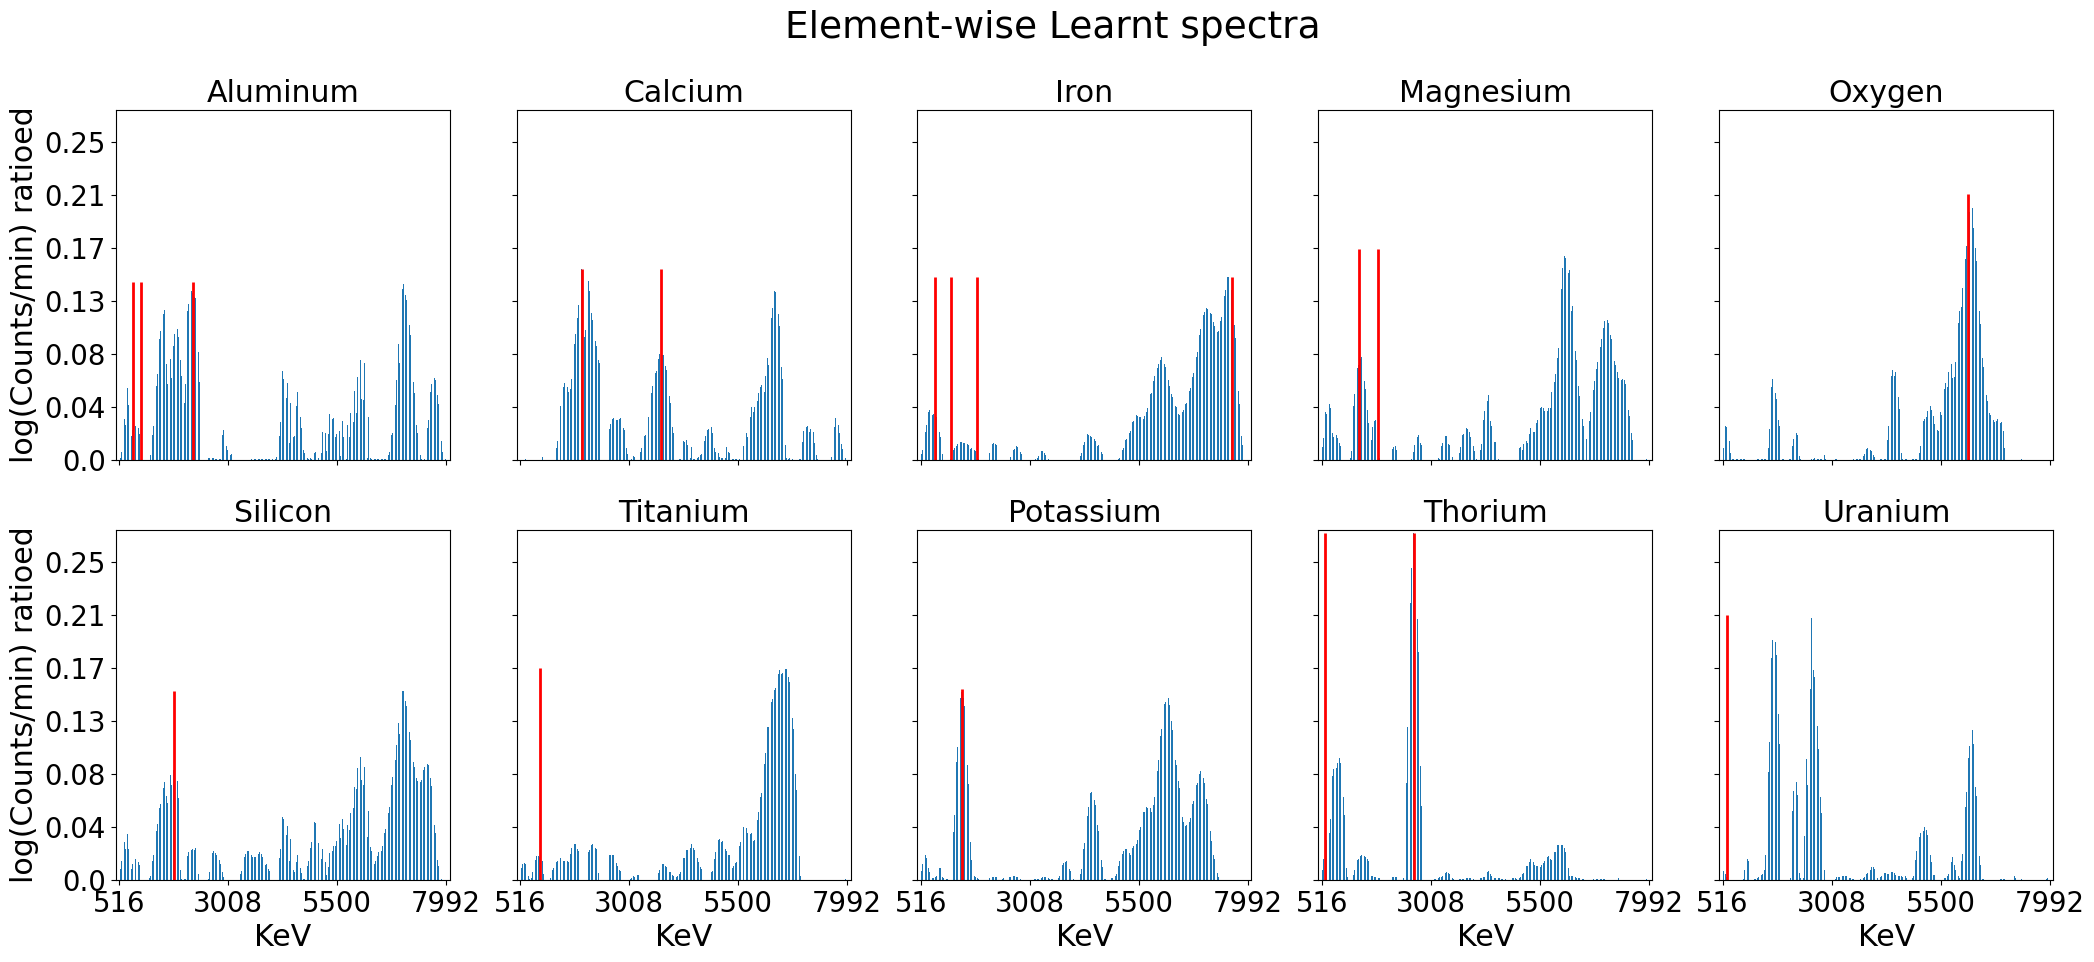

In [77]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=foldWiseLearntElementalSpectra[:,i,j]

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #plot the spectrum
    axes[i//5,i%5].bar(relaventEnergyBands,
                       currentElementSpectrum,
                       lw=10,
                       width=10)
    
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                                np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

Text(0.5, 0.98, 'Element-wise Learnt spectra')

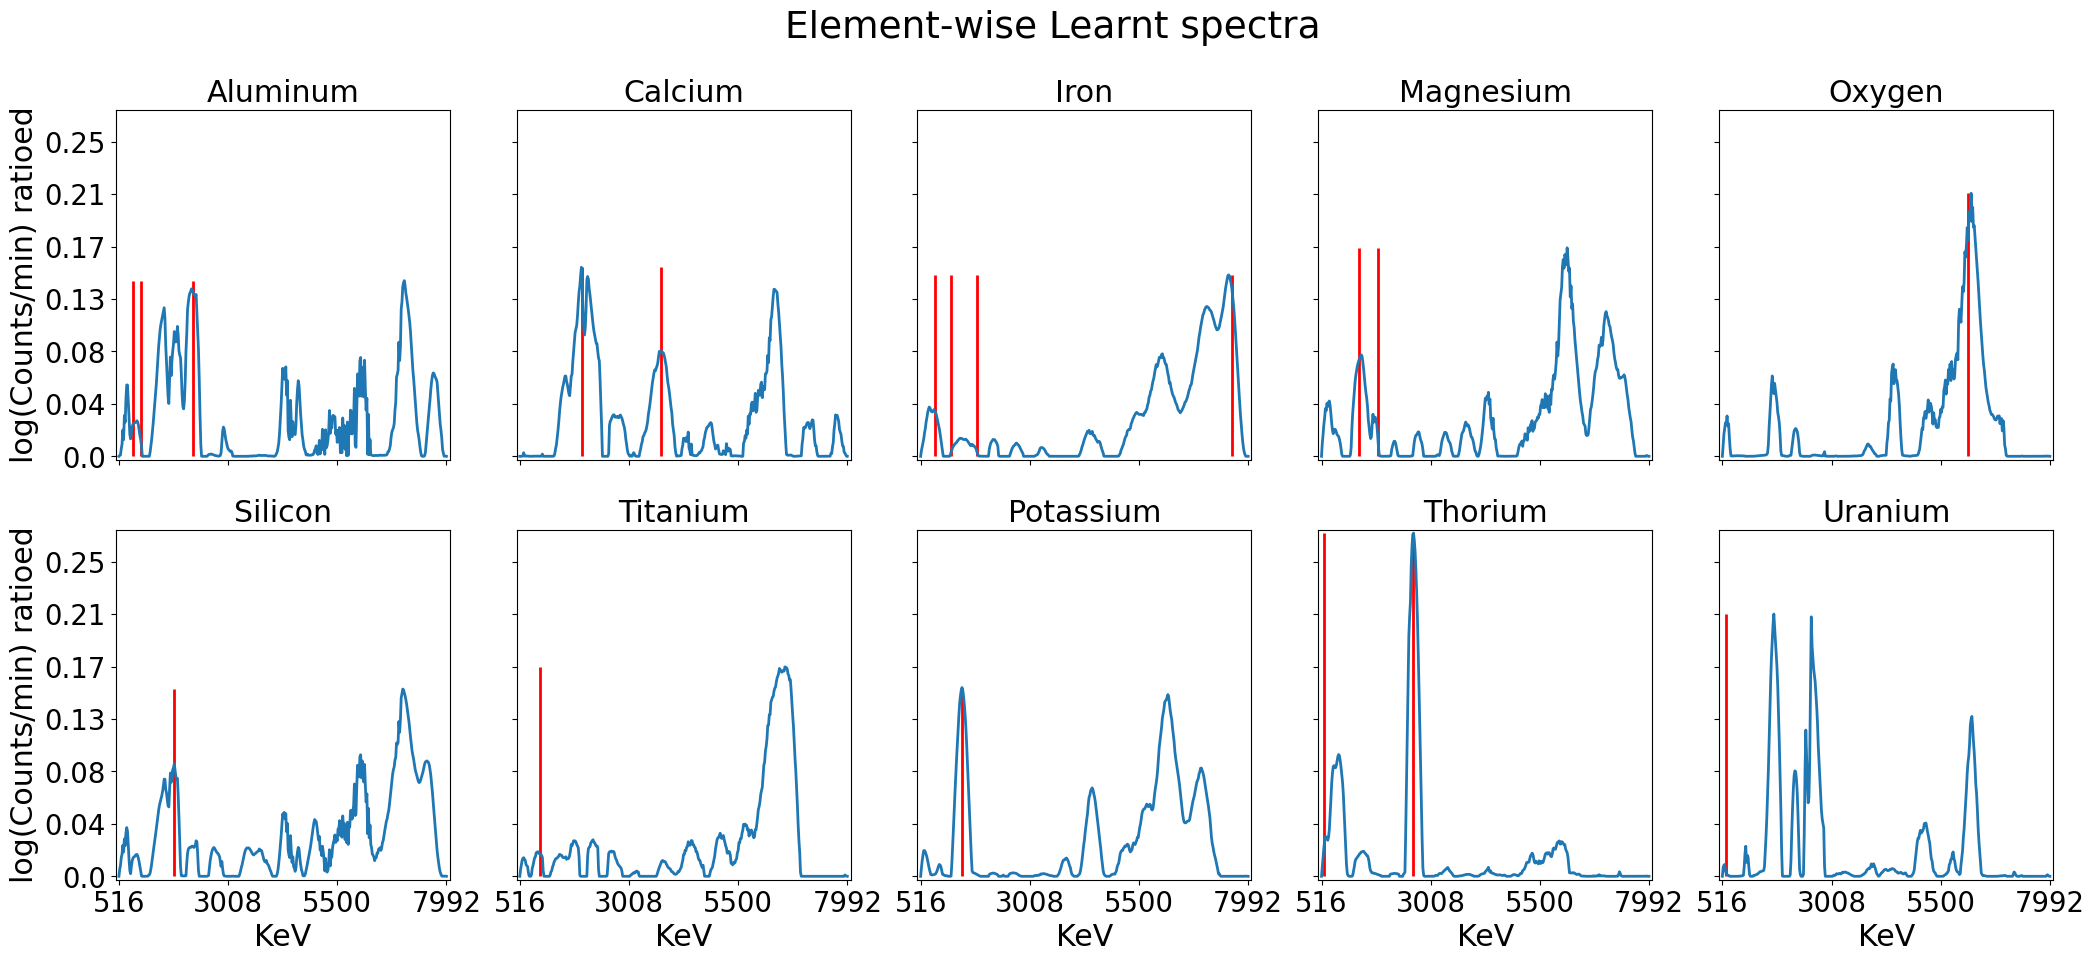

In [78]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=foldWiseLearntElementalSpectra[:,i,0]

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    
    #plot the spectrum
    axes[i//5,i%5].plot(relaventEnergyBands,
                        currentElementSpectrum,
                        lw=2)
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                                np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

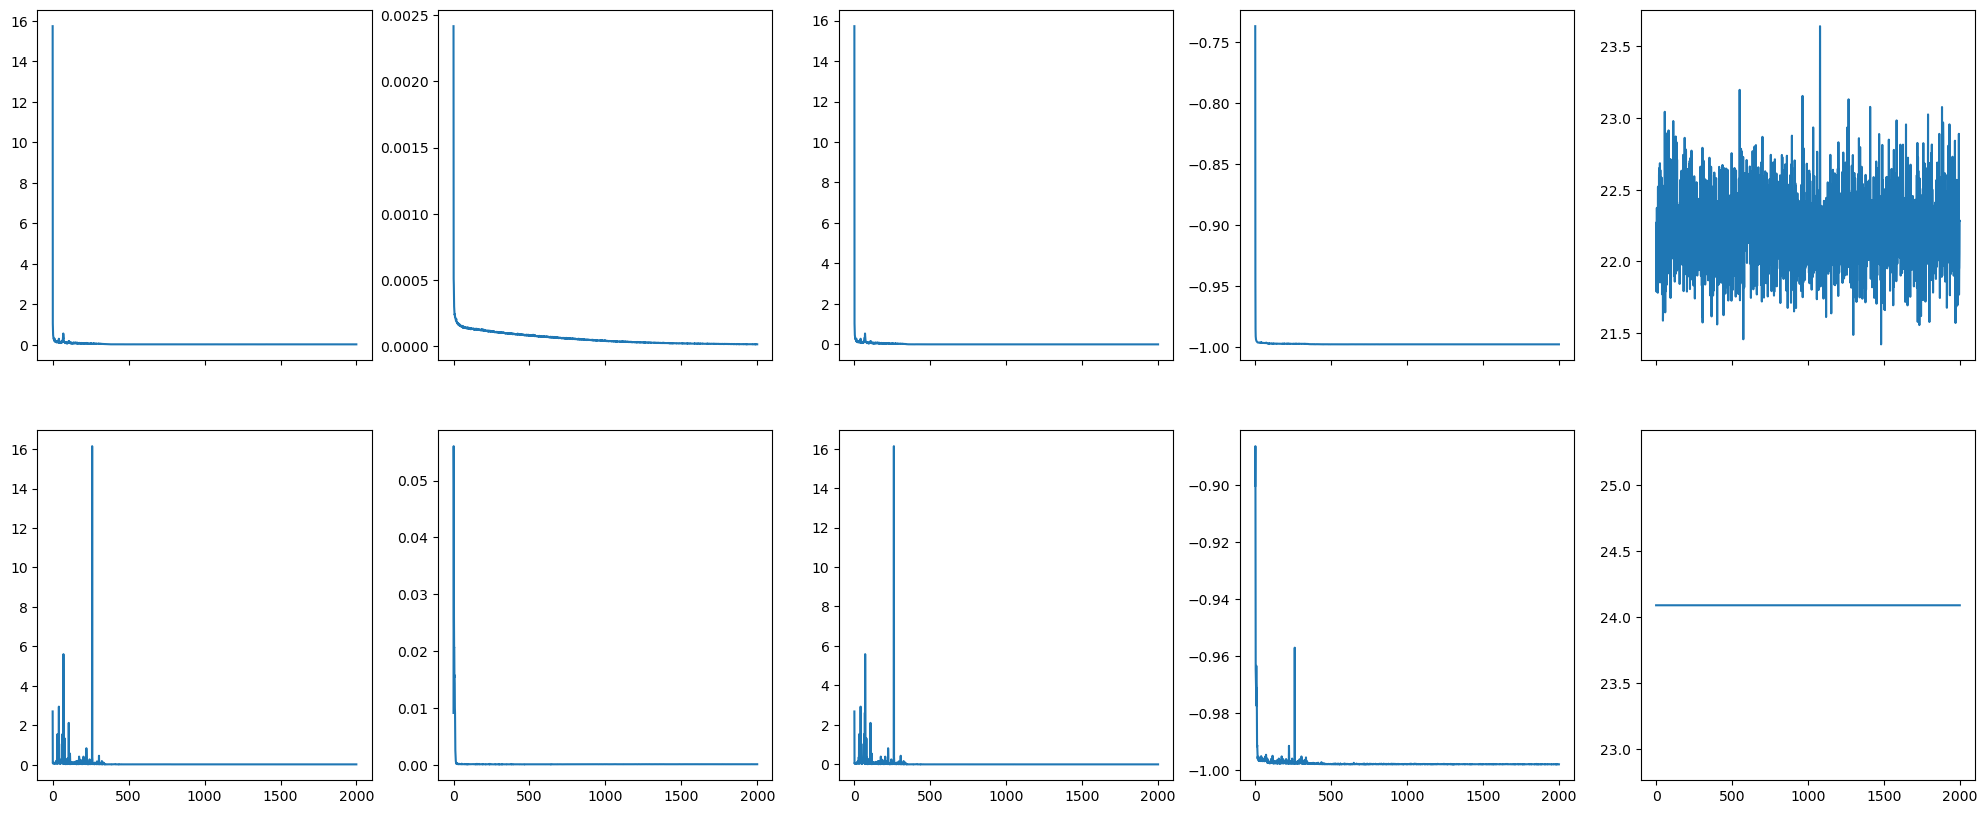

In [98]:
#get the history for the current fold
currentHistory=modelTrainingHistories[j].history
#create a figure
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=False)
#create an array to hold names of losses
lossNames=["Total","Regular Element","Nuclear Elements","Reconstruction","Regularization"]
#iterate through the history
for key,i in zip(currentHistory,range(len(currentHistory))):
    #check if the loss is for training or validation
    if i//5==0:
        #get the name for the current loss
        title="Training_"+lossNames[i%5]
    else:
        #get the name for the current loss
        title="Testing_"+lossNames[i%5]
    #plot the loss
    axes[i//5,i%5].plot(np.arange(len(currentHistory[key])),
                        currentHistory[key])
    

In [89]:
len(currentHistory)

10

In [79]:
#get the inputs and actual output values for the
testSpectra=preprocessedSpectra[testingIndices,:]
testRegularAbundances=regularElementalAbundances[testingIndices,:]
testNuclearAbundances=nuclearElementalAbundances[testingIndices,:]
#load weights for the first fold
trainedModelWeightsAddress="C:/ML4Sci/Models/trained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder_Fold_"+str(j+1)+".h5"
unmixingModel.save_weights(trainedModelWeightsAddress)
#get the predictions from the trained model
out=unmixingModel.predict(testSpectra)
print(out)

InvalidArgumentError: Graph execution error:

Detected at node 'Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model/tf.math.truediv_7/truediv' defined at (most recent call last):
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sandy\AppData\Local\Temp\ipykernel_3112\3916650029.py", line 10, in <module>
      out=unmixingModel.predict(testSpectra)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 2047, in predict_function
      outputs = step_function(self, iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\layers\core\tf_op_layer.py", line 242, in _call_wrapper
      return self._call_wrapper(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\layers\core\tf_op_layer.py", line 279, in _call_wrapper
      result = self.function(*args, **kwargs)
Node: 'Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model/tf.math.truediv_7/truediv'
Detected at node 'Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model/tf.math.truediv_7/truediv' defined at (most recent call last):
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sandy\AppData\Local\Temp\ipykernel_3112\3916650029.py", line 10, in <module>
      out=unmixingModel.predict(testSpectra)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 2047, in predict_function
      outputs = step_function(self, iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\layers\core\tf_op_layer.py", line 242, in _call_wrapper
      return self._call_wrapper(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\layers\core\tf_op_layer.py", line 279, in _call_wrapper
      result = self.function(*args, **kwargs)
Node: 'Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model/tf.math.truediv_7/truediv'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  required broadcastable shapes
	 [[{{node Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model/tf.math.truediv_7/truediv}}]]
	 [[while/loop_body_control/_391/_21]]
  (1) INVALID_ARGUMENT:  required broadcastable shapes
	 [[{{node Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model/tf.math.truediv_7/truediv}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_840358]

In [81]:
unmixingModel.summarize()

AttributeError: 'Functional' object has no attribute 'summarize'